# Lending Club Case Study 
## Introduction 
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default.


<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are <b>two types of decisions</b> that could be taken by the company:


1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)
    - <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
<p></p>
2. <b>Loan rejected:</b>The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives 

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

__`The objective is to study the variables which shall be available at the time of the application to identify the defaulters and reject their applications`__

# Data understanding

- The provided data is from 2007 till 2011 for the loan applicant who either fully paid the loan or defaulted or were current at that time.


In [1]:
# Import all the libraries required for the analysis
import pandas as pd
import numpy as np
import seaborn as sns

# Ignore warnings which can occur due to  version problems
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline 

# Import the library to check the encoding
import chardet

# To Convert scientific values into readable format 
pd.options.display.float_format = '{:,.2f}'.format


In [2]:
# Checking the encoding of the loan.csv file
with open("loan.csv", "rb") as rawdata:
    loan_result = chardet.detect(rawdata.read(2000))

loan_result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
# Load the Loan data set
loans_df = pd.read_csv("loan.csv")

# Check the shape of the data to understand the number of rows and columns available
print(loans_df.shape)

(39717, 111)


In [4]:
#Check the details of the data like columns names, total number of non-null values 
#and Data types of each of the columns

loans_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [5]:
# Check the data types of all the attributes in the data frame
loans_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Data cleaning
### Investigate  columns, rows for null values
- Calculate the percentage of the missing column
- Check the null values in the column
- Check the null values in the row
- Remove the null columns where <b> > 90%</b> data is missing using dropna method
- Remove columns where unique values are available as those are not going to help with our analysis
- Remove columns where <b> same values </b> are present for all the rows.
- Remove Customer behavior variables as those are post loan variables
- Separate month and year for loan issue date columns.
- Transform the malformed data to normalize the data types.
- Convert the years object type to float wherever needed
- Drop the rows where the loan status is current as this data will not help in achieving business objective
- Change the loan status to 1 or 0 for Charged off and fully paid 

In [6]:
#Calculating the percentage of the null columns
(((loans_df.isna().sum()/loans_df.shape[0])*100).sort_values(ascending=False))

verification_status_joint   100.00
annual_inc_joint            100.00
mo_sin_old_rev_tl_op        100.00
mo_sin_old_il_acct          100.00
bc_util                     100.00
                             ...  
delinq_amnt                   0.00
policy_code                   0.00
earliest_cr_line              0.00
delinq_2yrs                   0.00
id                            0.00
Length: 111, dtype: float64

In [7]:
# Since the list has 111 elements lets get it ordered by count and sort it ascentding to get the count.

((loans_df.isna().sum(axis=0)/loans_df.shape[0])*100).value_counts().sort_values(ascending=False)

100.00    54
0.00      43
0.14       2
32.58      1
6.19       1
1.75       1
0.13       1
0.01       1
92.99      1
0.18       1
0.10       1
64.66      1
97.13      1
0.03       1
2.71       1
dtype: int64

#### Observation
1. 54 colums are 100% - Drop this
2. 2 columns > 90 % - Drop this

In [8]:
#Remove the columns for which are > 90% rows data is not available
#Set the threshold percent is 0.1% of length of data frame 

threshold_percent = 0.1*len(loans_df)
loans_df = loans_df.dropna(axis = 1, thresh=threshold_percent)
loans_df.shape

(39717, 55)

In [9]:
# Calculate the percentage of the missing row

((loans_df.isna().sum(axis=1)/loans_df.shape[0])*100).round(2)

0       0.01
1       0.00
2       0.01
3       0.00
4       0.00
        ... 
39712   0.01
39713   0.01
39714   0.02
39715   0.02
39716   0.01
Length: 39717, dtype: float64

In [10]:
# Since the list has 39717 elements lets get it ordered by count and sort it ascentding to get the count.
((loans_df.isna().sum(axis=1)/loans_df.shape[0])*100).value_counts().sort_values(ascending=False)

0.00    21394
0.01     8868
0.00     8238
0.01      881
0.01      319
0.01       13
0.02        4
dtype: int64

#### Observation
None of the row has significant percentage to drop any.

### Remove the customer behavior columns

`The customer behavior columns are not helpful in this analysis as those will be created/available after the loan is processed.`

In [11]:
#Drop the customer behavior variables which are not available at the time of loan application, 
#and thus they cannot be used as predictors for credit approval.
cust_behaviour_variables = ['delinq_2yrs',
                            'earliest_cr_line',
                            'inq_last_6mths',
                            'open_acc',
                            'pub_rec',
                            'revol_bal',
                            'revol_util',
                            'total_acc',
                            'out_prncp',
                            'out_prncp_inv',
                            'total_pymnt',
                            'total_pymnt_inv',
                            'total_rec_prncp',
                            'total_rec_int',
                            'total_rec_late_fee',
                            'recoveries',
                            'collection_recovery_fee',
                            'last_pymnt_d',
                            'last_pymnt_amnt',
                            'last_credit_pull_d',
                            'application_type',
                            'funded_amnt',
                            'delinq_amnt',
                            'mths_since_last_delinq',
                            'collections_12_mths_ex_med',
                            'funded_amnt_inv']


loans_df = loans_df.drop(columns=cust_behaviour_variables)
loans_df.shape

(39717, 29)

### Remove the unique value columns and single value fields

`These columns will not help to conclude the target`

In [12]:
((loans_df.nunique()/loans_df.shape[0])*100).sort_values(ascending=False)

id                         100.00
url                        100.00
member_id                  100.00
emp_title                   72.56
desc                        66.79
title                       49.39
installment                 38.73
annual_inc                  13.39
dti                          7.22
loan_amnt                    2.23
zip_code                     2.07
int_rate                     0.93
issue_d                      0.14
addr_state                   0.13
sub_grade                    0.09
purpose                      0.04
emp_length                   0.03
grade                        0.02
home_ownership               0.01
pub_rec_bankruptcies         0.01
loan_status                  0.01
verification_status          0.01
term                         0.01
pymnt_plan                   0.00
initial_list_status          0.00
policy_code                  0.00
acc_now_delinq               0.00
chargeoff_within_12_mths     0.00
tax_liens                    0.00
dtype: float64

#### Observation
1. Since <b> id, member_id url </b> has 100% unique value which will not be helpful in the analysis thus we can <b> drop </b> it.
2. <b> emp_title, desc </b> has higher percentage we will verify and decide to drop it or not.

In [13]:
loans_df  = loans_df.drop(columns=['id', 'member_id', 'url'])
loans_df.shape

(39717, 26)

In [14]:
# Check the loans description
pd.set_option('display.max_colwidth', None)
loans_df.desc.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>
1      Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possibl

In [15]:
loans_df.emp_title.head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [16]:
loans_df.title.head()

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

#### Observation
1. <b> desc and title</b> information is available in <b>purpose</b> which is more meaningful thus we will drop this.
2. <b>empt_title </b> has employer name which does add any value addition to our analysis we will drop this 

In [17]:
loans_df = loans_df.drop(['desc','emp_title', 'title'], axis=1)
loans_df.shape

(39717, 23)

### Columns inspections
1. Fix the data in the column 
2. Fix the datatypes if any after inspecting each column data
3. Check the unique data in the columns and take decision accordingly

In [18]:
# Check issue_d 
loans_df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

#### Decision taken
1. Split the Year and Month and store store it into new 2 columns issue_d_month and issue_d_year respectively
2. Append 20 to the year dataset for example 11 will be 2011
3. Change the data types to integer for year
4. Drop the column issue_d as this will be redundant

In [19]:
loans_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'dti', 'initial_list_status', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [20]:
# Lets split the Year and Month and store it into new 2 columns issue_d_month and issue_d_year respectively
loans_df['issue_d_month'], loans_df['issue_d_year'] = loans_df.issue_d.str.split('-').str

# Append 20 to the year dataset for example 11 will be 2011
loans_df['issue_d_year'] = '20' + loans_df['issue_d_year']

# Change the data type to integer
loans_df['issue_d_year'] = loans_df['issue_d_year'].astype(int)

In [21]:
#As the we separated the month and year from issue_d column, removing the issue_d as it is a redudant column
loans_df = loans_df.drop('issue_d', axis = 1)
loans_df.shape

(39717, 24)

In [22]:
# Remove all the columns which as the same value or same value and NaN value
print (loans_df.chargeoff_within_12_mths.value_counts())
print (loans_df.acc_now_delinq.value_counts())
print (loans_df.initial_list_status.value_counts())
print (loans_df.pymnt_plan.value_counts())
print (loans_df.tax_liens.value_counts())
print (loans_df.policy_code.value_counts())


0.00    39661
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
n    39717
Name: pymnt_plan, dtype: int64
0.00    39678
Name: tax_liens, dtype: int64
1    39717
Name: policy_code, dtype: int64


In [23]:
single_value_columns = ['chargeoff_within_12_mths', 
                        'acc_now_delinq', 
                        'initial_list_status', 
                        'pymnt_plan', 
                        'tax_liens', 
                        'policy_code']

loans_df = loans_df.drop(single_value_columns, axis = 1)
loans_df.shape

(39717, 18)

In [24]:
loans_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year'],
      dtype='object')

In [25]:
# Verify emp_length column
loans_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

#### Decision taken
1. Convert 10+ years = 10.5 
2. < 1 year = 0.5 

In [26]:
# Align the data types
# Replace 10+ years = 10.5 and < 1 year = 0.5 
loans_df.emp_length.replace({'10+ years' : '10.5 years','< 1 year' : '0.5 year'},inplace=True)

# Remove years from emp_lengtt and comvert it into float
loans_df.emp_length = loans_df.emp_length.apply(lambda x:float(str(x).split()[0]))

loans_df.emp_length.describe()

count   38,642.00
mean         5.15
std          3.65
min          0.50
25%          2.00
50%          4.00
75%          9.00
max         10.50
Name: emp_length, dtype: float64

In [27]:
#  Check int_rate column
loans_df.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [28]:
# Remove the percentage from the interest rate and comvert it into float
loans_df.int_rate = loans_df.int_rate.apply(lambda x: float(x.replace('%','')))

In [29]:
loans_df.int_rate.head()

0   10.65
1   15.27
2   15.96
3   13.49
4   12.69
Name: int_rate, dtype: float64

In [30]:
# Check term column
loans_df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [31]:
# Remove the months from the term convert it into int
loans_df.term = loans_df.term.str.split(' ').str[1].astype(int)

In [32]:
# Verify the change
loans_df.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

#### Loan status 
Step 1 : Status = 'Current', theey are neither fully paid not defaulted, so we willl drop the current loans data.

Step 2: Tag the other two values as Fully Paid = 0 and Charged Off = 1 to make your analysis simple and clean.

In [33]:
# Remove the rows where the loan_status = current we dont need it
loans_df = loans_df[~(loans_df.loan_status == "Current")]

In [34]:
# Check the values afrer the change is committed
loans_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [35]:
# Tag fully paid = 0 or Charged off = 1 to make your analysis simple and clean

loans_df.loan_status.replace({'Fully Paid' : 0,'Charged Off' : 1},inplace=True)

In [36]:
# Check the values afrer the change is committed
loans_df.loan_status.value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [37]:
# Check the percentage of missing values to see which columns are of interest for imputation
round(100*(loans_df.isnull().sum()/len(loans_df.index)), 2).sort_values(ascending=False)

emp_length             2.68
pub_rec_bankruptcies   1.81
loan_amnt              0.00
loan_status            0.00
issue_d_month          0.00
dti                    0.00
addr_state             0.00
zip_code               0.00
purpose                0.00
verification_status    0.00
term                   0.00
annual_inc             0.00
home_ownership         0.00
sub_grade              0.00
grade                  0.00
installment            0.00
int_rate               0.00
issue_d_year           0.00
dtype: float64

### Imputation recommendations

In [38]:
# Check representative data points for emp_length
loans_df.emp_length.describe()

count   37,544.00
mean         5.11
std          3.64
min          0.50
25%          2.00
50%          4.00
75%          9.00
max         10.50
Name: emp_length, dtype: float64

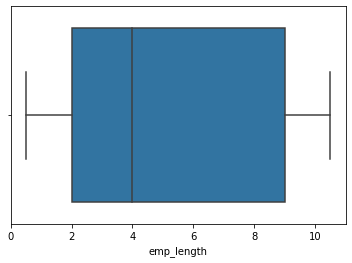

In [39]:
# Check for outliers
sns.boxplot(loans_df.emp_length)
plt.show()

#### Conclusion:  Column = emp_length

- Mean and Median there are no much difference and there are no  outliers as well thus we can chose 
<b>Mean = 5.11 </b> as impute value.

- Employee length directly impacts the loan amount eligibility and the salary, hence imputing the null values could lead to create the bias in the data
- As result of this, <b> we will remove the null values </b>
- Since the percentage of data is 2.5% a small percent this should not effect the analysis.


In [40]:
loans_df = loans_df[~(loans_df.emp_length.isnull())]

In [41]:
loans_df.pub_rec_bankruptcies.value_counts()

0.00    35312
1.00     1530
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

In [42]:
loans_df.pub_rec_bankruptcies.describe()

count   36,847.00
mean         0.04
std          0.20
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          2.00
Name: pub_rec_bankruptcies, dtype: float64

#### Conclusion:  Column = pub_rec_bankruptcies

Since most of the values 75% of data points are 0 thus we can chose <b>Median = 0 </b> as impute value.

In [43]:
round(100*(loans_df.isnull().sum()/len(loans_df.index)), 2).sort_values(ascending=False)

pub_rec_bankruptcies   1.86
loan_amnt              0.00
term                   0.00
issue_d_month          0.00
dti                    0.00
addr_state             0.00
zip_code               0.00
purpose                0.00
loan_status            0.00
verification_status    0.00
annual_inc             0.00
home_ownership         0.00
emp_length             0.00
sub_grade              0.00
grade                  0.00
installment            0.00
int_rate               0.00
issue_d_year           0.00
dtype: float64

In [44]:
loans_df.grade.value_counts()

B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

In [45]:
loans_df.sub_grade.value_counts()

A4    2792
B3    2746
A5    2634
B5    2559
B4    2388
C1    2014
B2    1944
C2    1899
A3    1741
B1    1722
C3    1458
A2    1441
D2    1255
C4    1176
C5    1122
D3    1090
A1    1052
D1     916
D4     905
D5     813
E1     711
E2     605
E3     504
E4     419
E5     381
F1     301
F2     228
F3     172
F4     148
F5     110
G1      93
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

#### Conclusion: Column = sub_grade seems to be duplicate of grade however it is retained to check the usage in the analysis phase.

#### Variable details

|SR#   |Column             |Dtype   |Description                                                                            
|-|-|-|-|
0   |loan_amnt            |int64     |Loan amount that applicant has opted for.                                             
1   |term                 |int64     |Loan term to pay out the loan.                                                        
2   |int_rate             |float64   |Interest rate applied to repay the loan.                                              
3   |installment          |float64   |Installment is the amount which includes the captal+interest to pay out the loan      
4   |grade                |object    |Grade is ranking done by company to decide the interest rates to apply to applicants based on several history behavior parameters    
5   |sub_grade            |object    |Sub grades are internal further breakdown of grades.   
6   |emp_length           |float64   |Employee length is the experience of applicant   
7   |home_ownership       |object    |Home ownership status of applicant to denote the house is owned or rented or mortgaged.    
8   |annual_inc           |float64   |Annual income of the applicant   
9   |verification_status  |object    |Verification status of applicant documents, credit behavior, etc.   
10  |loan_status          |int64     |Loan status whether it is fully paid or charged off or still being payed.  
11  |purpose              |object    |Purpose for which the loaned amount will be utilized   
12  |zip_code             |object    |Zip code of applicant's residence.   
13  |addr_state           |object    |State where applicant is residing   
14  |dti                  |float64   |Debt to income ratio which signifies the financial health of applicant   
15  |pub_rec_bankruptcies |float64   |Public record bankrupcies if filed any.   
16  |issue_d              |object    |The month and year when the loan was issued.   

### Function definitions used for plotting

In [46]:
def plot_dist_box_subplots(data, var, xlabel, ylabel = None, title = None, fig_size=None):
    """
    For given inputs plot the ditribution and box plots. 
    
    input:
    data - Data frame,
    var - Variables in data
    xlabel, ylabel - labels to be used for x, y axis
    title - title of the plot
    fig_size - Optional. Width, height in inches. 
    
    output:Plot the bar plot for all the 
    """
    
    if(fig_size == None):
        plt.figure(figsize=(14,4))
    else:
        plt.figure(figsize=fig_size)

    sns.set(font_scale=1)
    plt.subplot(1,2,1)
    plot_1 = sns.distplot(a=data[var], rug=True, color='green')
    plot_1.set_xlabel (xlabel, color='green', fontweight = 'bold')

    plt.subplot(1,2,2)
    plot_2 = sns.boxplot(data=data[var], color = 'green')
    plot_2.set_xlabel (xlabel, color='green', fontweight='bold')

    plt.suptitle(title,color='green',fontweight='bold')
    plt.show()

In [47]:
def plot_bar(data, xvar, yvar, xlabel, ylabel, title, fig_size=None, order=None, fontscale=None, xticks=None, yscale=None):
    """
    For given inputs plot the Bar plot 
    
    input:
    data - Data frame,
    xvar, yvar - Variables in data
    xlabel, ylabel - labels to be used for x, y axis
    title - title of the plot
    fig_size - Optional. Width, height in inches. 
    order - Optional. Order to be used by the variables
    fontscale - Optional. Font size
    xticks - Optional. Orientation of the x tick labels.
    yscale - Optional. Values: { “linear”, “log”, “symlog”, “logit”, … }
    
    output:Plot the bar plot for all the 
    """
    if fig_size == None:
        plt.figure(figsize=(8,4))
    else:
        plt.figure(figsize=fig_size)
    
    if fontscale == None:
        sns.set(font_scale=1.5)    
    else:
        sns.set(font_scale=fontscale)
    
    sns.barplot(x=xvar, y=yvar, data=data, order= order)
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')

    plt.title(title, color='black', fontweight='bold')
    
    if(yscale != None):
        plt.yscale(yscale)
        
    if xticks != None:
            plt.xticks(rotation=xticks)
    plt.show()

In [48]:
def plot_barplots_sidebyside(data, xvar, y1var, y2var, xlabel, y1label,y2label, title1, title2,
                             fig_size=None, order1=None, order2 = None, fontscale=None,
                             xticks=None, yscale=None, isvertical=None):
    """
    For given inputs plot the Bar plot side by side 
    
    input:
    data - Data frame,
    xvar, y1var, y2var - Variables in data
    xlabel, y1label, y2label - labels to be used for x, y axis
    title1, title2 - title of the plot
    fig_size - Optional. Width, height in inches. 
    order1, order2 - Optional. Order to be used by the variables
    fontscale - Optional. Font size
    xticks - Optional. Orientation of the x tick labels.
    yscale - Optional. Values: { “linear”, “log”, “symlog”, “logit”, … }
    isvertical - Optional. Orientation of the plot.
    
    output:Plot the bar plot for all the 
    """
    x1var = xvar
    x2var = xvar
    x1label = xlabel
    x2label = xlabel
    if isvertical != None:        
        x1var = y1var
        x2var = y2var
        y1var = xvar
        y2var = xvar
        x1label = y1label
        x2label = y2label
        y1label = xlabel
        y2label = xlabel
        
    # Plot the data
    if fig_size == None:
        plt.figure(figsize=(16,4))
    else:
        plt.figure(figsize=fig_size)
        
    if fontscale == None:
        sns.set(font_scale=1.5)    
    else:
        sns.set(font_scale=fontscale)

 
    # subplot 1
    plt.subplot(1, 2, 1)
    fig_1 = sns.barplot(x=x1var, y=y1var, data=data, order=order1)
    fig_1.set_title(title1,color='black',fontweight='bold')
    fig_1.set_xlabel(x1label, color='black',fontweight='bold')
    fig_1.set_ylabel(y1label ,color='black',fontweight='bold')


    # subplot 2
    plt.subplot(1, 2, 2)
    fig_2 = sns.barplot(x=x2var, y=y2var, data=data, order=order2)
    fig_2.set_title(title2,color='black',fontweight='bold')
    fig_2.set_xlabel(x2label, color='black',fontweight='bold')
    fig_2.set_ylabel(y2label ,color='black',fontweight='bold')

    if(yscale != None):
        plt.yscale(yscale)
        
    if xticks != None:
        plt.xticks(rotation=xticks)
    
    plt.show()

# Data Analysis
## Univariate Analysis - Quantitative Variables

#### Summary statistics

In [49]:
# The summary statiscs provides the descriptive statistics of the numeric variables
loans_df.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,pub_rec_bankruptcies,issue_d_year
count,"37,544.00","37,544.00","37,544.00","37,544.00","37,544.00","37,544.00","37,544.00","37,544.00","36,847.00","37,544.00"
mean,"11,119.33",41.92,11.96,324.65,5.11,"69,407.08",0.14,13.28,0.04,"2,010.30"
std,"7,354.10",10.34,3.68,208.90,3.64,"64,676.98",0.35,6.66,0.20,0.89
min,500.00,36.00,5.42,15.69,0.50,"4,000.00",0.00,0.00,0.00,"2,007.00"
25%,"5,500.00",36.00,8.94,167.37,2.00,"41,000.00",0.00,8.16,0.00,"2,010.00"
50%,"10,000.00",36.00,11.83,280.00,4.00,"60,000.00",0.00,13.38,0.00,"2,011.00"
75%,"15,000.00",36.00,14.42,428.94,9.00,"83,000.00",0.00,18.55,0.00,"2,011.00"
max,"35,000.00",60.00,24.40,"1,305.19",10.50,"6,000,000.00",1.00,29.99,2.00,"2,011.00"


### Loan Amount (loan_amnt)

In [50]:
loans_df.loan_amnt.describe()

count   37,544.00
mean    11,119.33
std      7,354.10
min        500.00
25%      5,500.00
50%     10,000.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

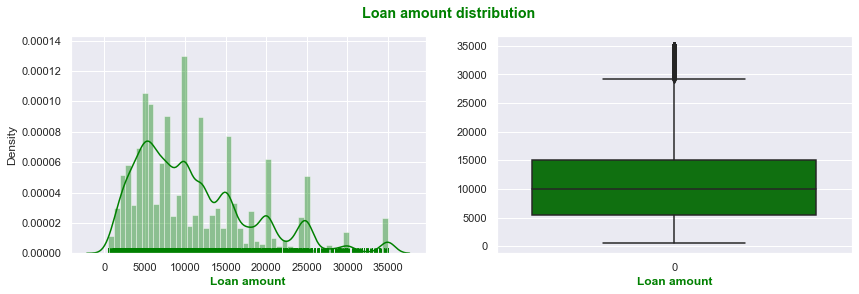

In [51]:
#Loan amount is a discrete numerical variable so we can use dist plot and box plot to analyse the information
plot_dist_box_subplots(loans_df, 'loan_amnt', 'Loan amount', title = 'Loan amount distribution')

##### Analysis
-  The most preferred loan amount range varies from 5000 to 15000.
-  The median is 10000 and mean is 11141.32. There are a few outliers.
-  There are outliers ranging above 35000
-  The purpose may help to identify the different reasons for the smaller/larger amount of loans
-  The groupby on loan_status could help to identify the ratio of defaulters to the loan amount ranges.

### Interest rate (int_rate)

In [52]:
loans_df.int_rate.describe()

count   37,544.00
mean        11.96
std          3.68
min          5.42
25%          8.94
50%         11.83
75%         14.42
max         24.40
Name: int_rate, dtype: float64

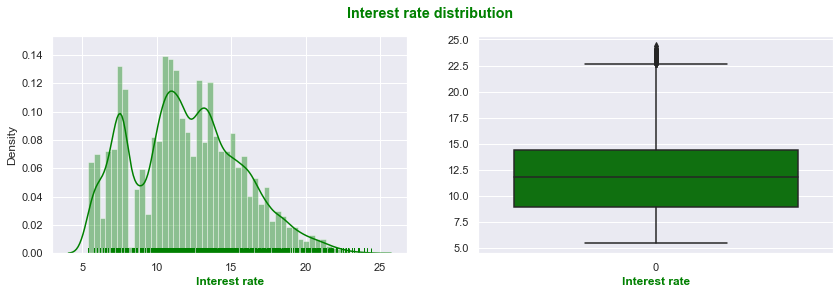

In [53]:
#Interest rate is a continuous numerical variable so we can use dist plot and box plot to analyse the information
plot_dist_box_subplots(loans_df, 'int_rate', 'Interest rate', title = 'Interest rate distribution')

##### Analysis
-  The interest rates range varies from 8% to 15%.
-  The median intereset rate is ~11.86% and mean is 11.98 which means there are close to none outliers.
-  The grade and subgrade variables could help to understand the defaulters behavior

### Installment (installment)

In [54]:
loans_df.installment.describe()

count   37,544.00
mean       324.65
std        208.90
min         15.69
25%        167.37
50%        280.00
75%        428.94
max      1,305.19
Name: installment, dtype: float64

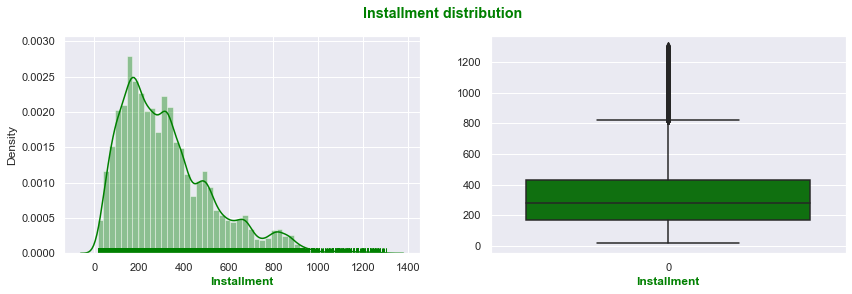

In [55]:
#Interest rate is a continuous numerical variable so we can use dist plot and box plot to analyse the information
plot_dist_box_subplots(loans_df, 'installment', 'Installment', title = 'Installment distribution')

##### Analysis
-  The installment varies mostly between 167 and 428.
-  The median is ~280 and mean is ~324.
-  The defaulters' intstallments could provide more insights.

### Annual Income (annual_inc)

In [56]:
loans_df.annual_inc.describe()

count      37,544.00
mean       69,407.08
std        64,676.98
min         4,000.00
25%        41,000.00
50%        60,000.00
75%        83,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

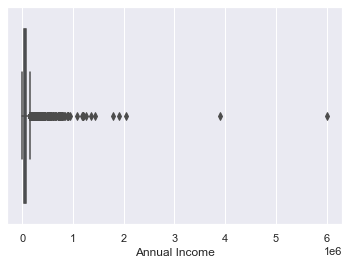

In [57]:
#Box Plot the annual income
sns.boxplot(x=loans_df.annual_inc)
plt.xlabel('Annual Income')
plt.show()

#### Observation:
1. Data has too many outliers thus we will restrict the data < 100000
2. The median is ~60000 and mean is ~69000.
3.  The defaulters' annual incomes could provide more insights in the behaviorial pattern.

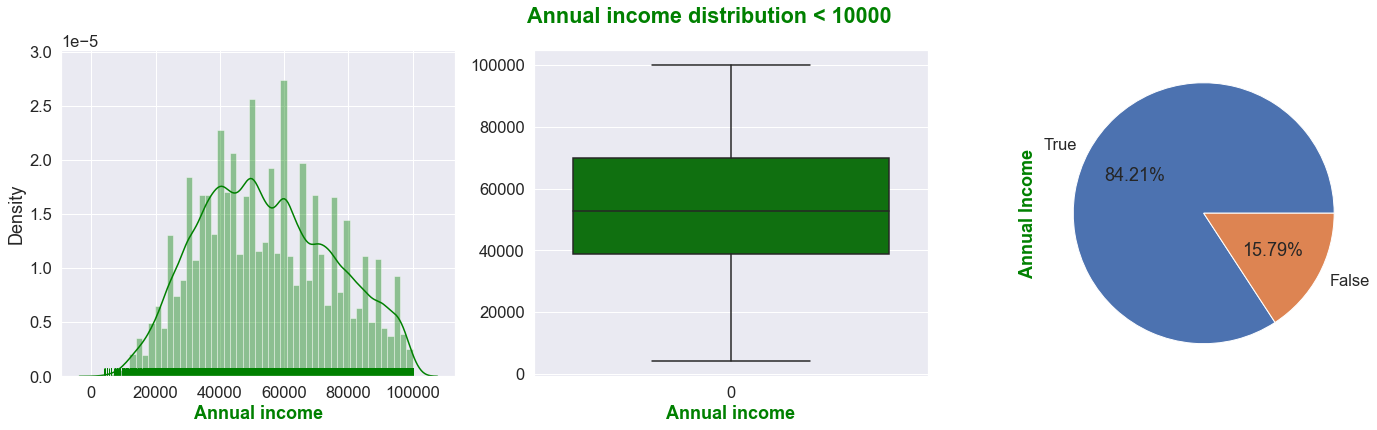

In [58]:
#As we saw the whole range has several outlisers, we will cleanse the outliers.
#Annual income is a continuous numerical variable so we can use dist plot and box plot to analyse the information

ann_dist = loans_df[loans_df.annual_inc < 100000]

plt.figure(figsize=(24,6))
sns.set(font_scale=1.5)

plt.subplot(1,3,1)
plot_1 = sns.distplot(a=ann_dist.annual_inc, rug=True, color='green')
plot_1.set_xlabel ('Annual income',color='green',fontweight='bold')


plt.subplot(1,3,2)
plot_2 = sns.boxplot(data=ann_dist.annual_inc, color = 'green')
plot_2.set_xlabel ('Annual income',color='green',fontweight='bold')


# subplot 2
plt.subplot(1, 3, 3)
plot_3 = (loans_df.annual_inc < 100000).value_counts().plot.pie(autopct='%1.2f%%')
plot_3.set_ylabel('Annual Income' ,color='green',fontweight='bold')


plt.suptitle('Annual income distribution < 10000',color='green',fontweight='bold')
plt.show()


#### Observation
1. 85% of loan applicant have got the income below 100000
2. 75% of loan applicant have got the income below 82000
3. Most of population income lies  between  42000 and 82000

### Debt to income ratio (dti)

In [59]:
loans_df.dti.describe()

count   37,544.00
mean        13.28
std          6.66
min          0.00
25%          8.16
50%         13.38
75%         18.55
max         29.99
Name: dti, dtype: float64

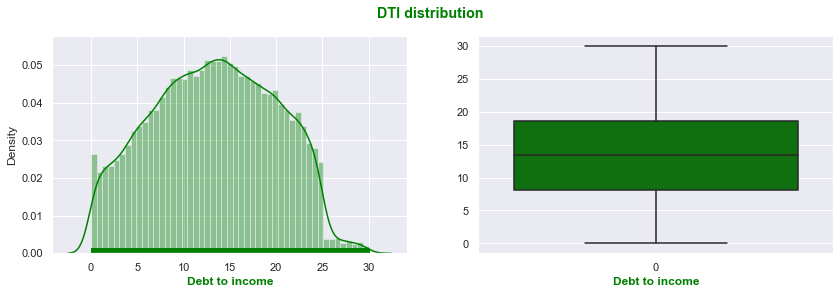

In [60]:
#DTI is a continuous numerical variable so we can use dist plot and box plot to analyse the information
plot_dist_box_subplots(loans_df, 'dti', 'Debt to income', title = 'DTI distribution')

##### Analysis
-  The DTI has close normal distribution.
-  The median is ~13.42 and mean is ~13.330.
-  The defaulters' DTI could provide more insights in the behaviorial pattern.

## Univariate Analysis - Catergorical  Variables


#### Term (term)

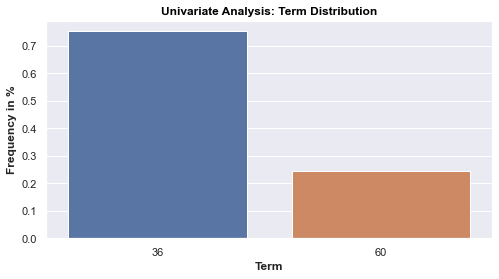

In [61]:
#Term is a ordered categorical numerical variable so we can use dist plot and box plot to analyse the information
term_data = loans_df.term.value_counts(normalize=True).reset_index()
plot_bar(data = term_data, xvar = 'index', yvar = 'term', xlabel = 'Term', 
         ylabel = 'Frequency in %', title = 'Univariate Analysis: Term Distribution', fontscale = 1)

##### Analysis
-  Most of the people are opting for 36 months loan which is obvious given the fact that the majority of the population sample is applying for loan ranging from 5000 to 15000
-  Loan Term, loan amount and defaulter's group could provide further insights

#### Grade (grade)

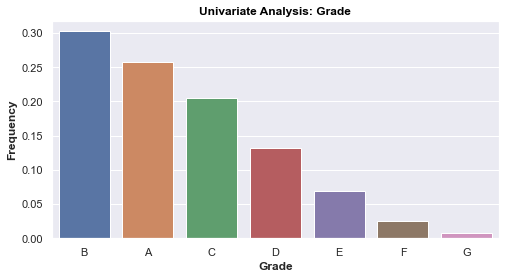

In [62]:
grade_data = loans_df.grade.value_counts(normalize=True).reset_index()
plot_bar(data = grade_data, xvar = 'index', yvar = 'grade', xlabel = 'Grade', 
         ylabel = 'Frequency', title = 'Univariate Analysis: Grade', fontscale = 1)

##### Analysis
-  Most of the population sample is falling in the B grade which is an expected bucket for the population
-  In bivariate analysis, the corelation of defaulters with grades and subgrades will be quite insightful

#### Sub Grade (sub_grade)

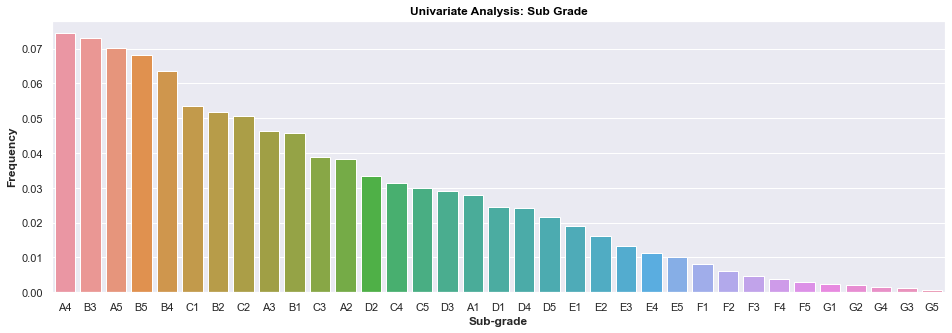

In [63]:
sub_grade_data = loans_df.sub_grade.value_counts(normalize=True).reset_index()
plot_bar(data = sub_grade_data, xvar = 'index', yvar = 'sub_grade', xlabel = 'Sub-grade', 
         ylabel = 'Frequency', title = 'Univariate Analysis: Sub Grade', fig_size = (16,5), fontscale = 1)

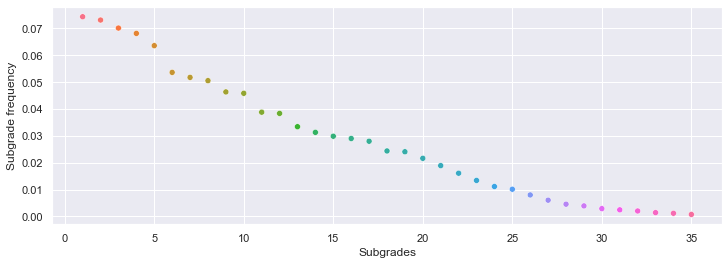

In [64]:
sub_grade_data = sub_grade_data.rename(columns={'index': 'subGradeKey'})
sub_grade_data['Rank'] = range(1,sub_grade_data.shape[0]+1)
sns.set(font_scale=1)
plt.figure(figsize=[12,4])

graph = sns.scatterplot(sub_grade_data.Rank,sub_grade_data.sub_grade, hue=sub_grade_data.subGradeKey, legend = False)
graph.set(xlabel = 'Subgrades', ylabel='Subgrade frequency')

plt.show()

##### Analysis
-  As we can see there is a power law distribution available in the subgrade type, it is clear that there is a preferential attachment to the data set.
-  In bivariate analysis, the corelation of defaulters with grades and subgrades will be quite insightful

#### Employment experience (emp_length)

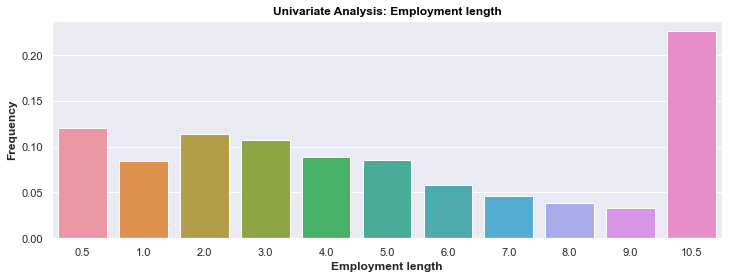

In [65]:
emp_length_data = loans_df.emp_length.value_counts(normalize=True).reset_index()

plot_bar(data = emp_length_data, xvar = 'index', yvar = 'emp_length', xlabel = 'Employment length', 
         ylabel = 'Frequency', title = 'Univariate Analysis: Employment length', fig_size = (12,4), fontscale = 1)

#### Analysis
1. Most of the loan applicents have employee length more than 10+ years constuting around 22.61%

#### Home Ownership  (home_ownership)


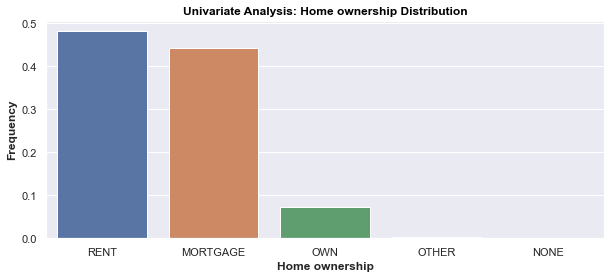

In [66]:
home_ownership_data = loans_df.home_ownership.value_counts(normalize=True).reset_index()
plot_bar(data = home_ownership_data, xvar = 'index', yvar = 'home_ownership', xlabel = 'Home ownership', 
         ylabel = 'Frequency', title = 'Univariate Analysis: Home ownership Distribution', fig_size = (10,4), fontscale = 1)

#### Analysis
Most of the loan applicants are rented (47.9%) or Mortgage (44%). The applicants who own the house is (8%).


#### Verification Status  (verification_status)


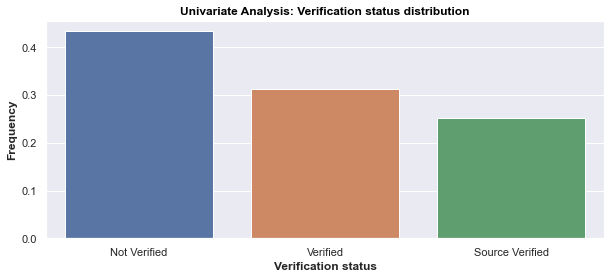

In [67]:
verification_status_data = loans_df.verification_status.value_counts(normalize=True).reset_index()
plot_bar(data = verification_status_data, xvar = 'index', yvar = 'verification_status', xlabel = 'Verification status', 
         ylabel = 'Frequency', title = 'Univariate Analysis: Verification status distribution', fig_size = (10,4), fontscale = 1)

<b>Analysis</b>
1. Around 57% of data points are verified
2. 43% of data are not verified

#### Loan Status  (loan_status)


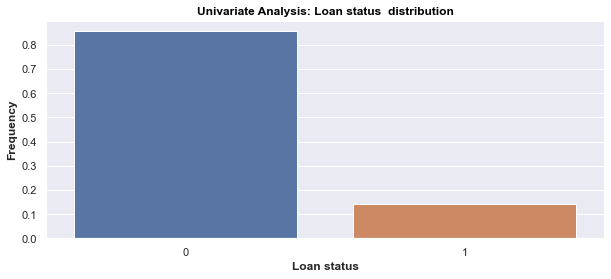

In [68]:
loan_status_data = loans_df.loan_status.value_counts(normalize=True).reset_index()
plot_bar(data = loan_status_data, xvar = 'index', yvar = 'loan_status', xlabel = 'Loan status', 
         ylabel = 'Frequency', title = 'Univariate Analysis: Loan status  distribution', fig_size = (10,4), fontscale = 1)

<b>Analysis</b> 
1. Around 85% of loans are fully paid
2. Only 15% of people are defaulters.

#### Purpose  (purpose)

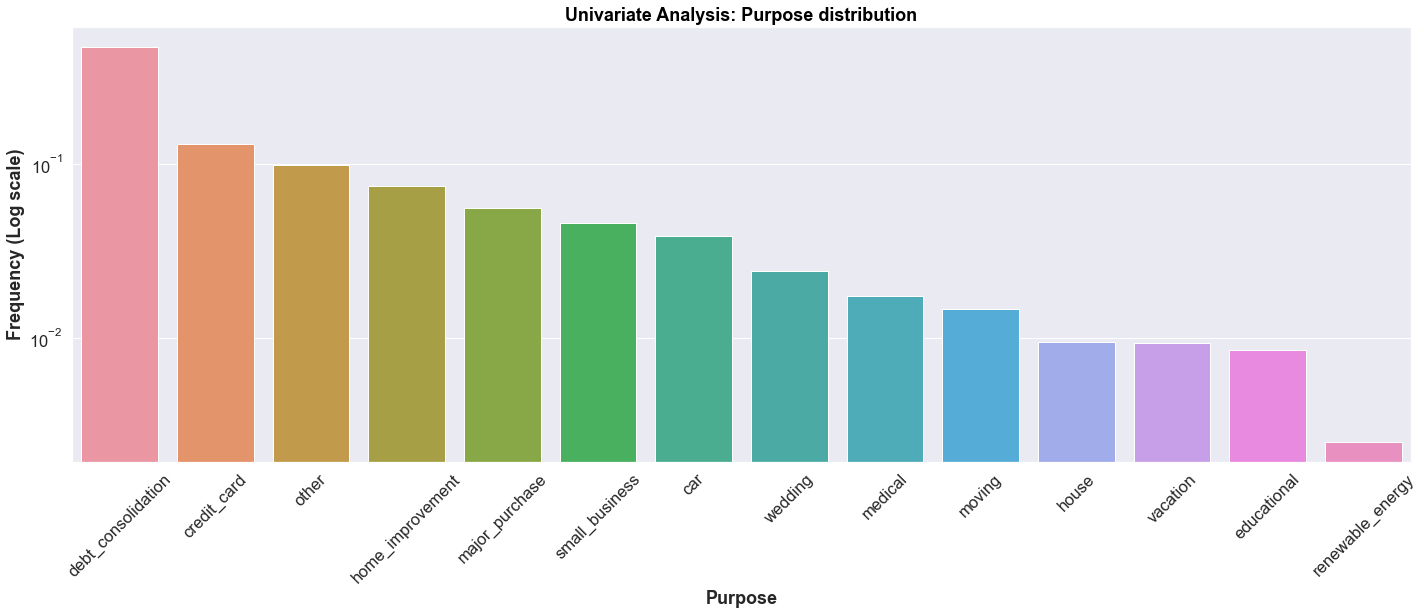

In [69]:
purpose_data = loans_df.purpose.value_counts(normalize=True).reset_index()
plot_bar(data = purpose_data, xvar = 'index', yvar = 'purpose', xlabel = 'Purpose', 
         ylabel = 'Frequency (Log scale)', title = 'Univariate Analysis: Purpose distribution', 
         fig_size = (24, 8), fontscale = 1.5, xticks = 45, yscale='log')

#### Analysis
Most of the loan purpose is for debt consolidation(45%+) followed by credit card (10% +)

#### Address Stats  (addr_state)

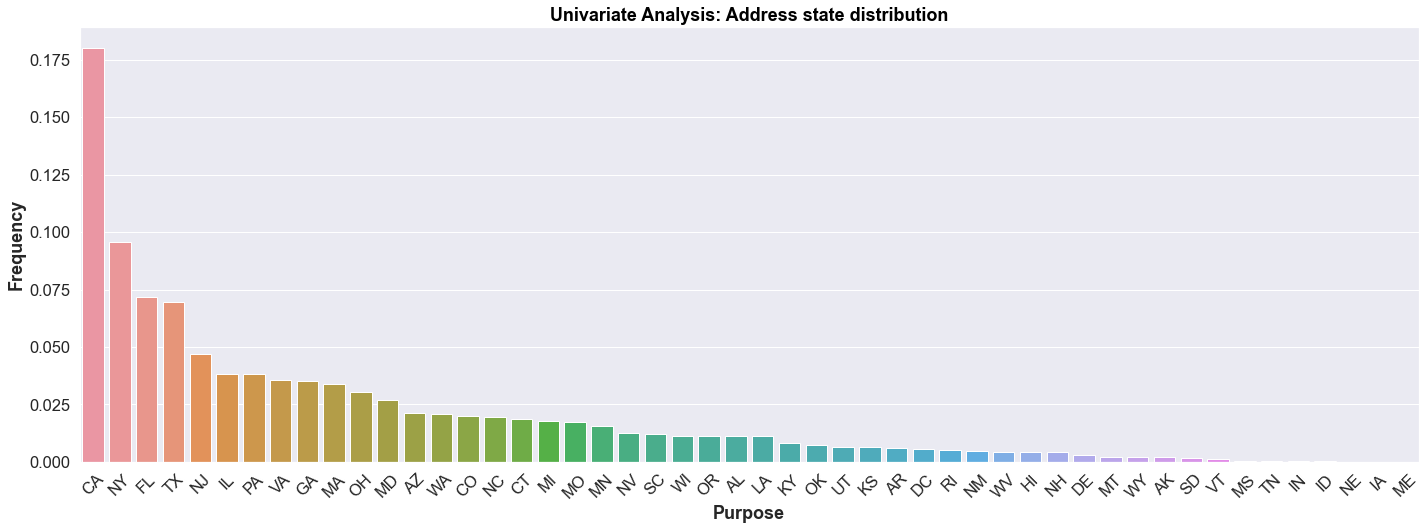

In [70]:
addr_state_data = loans_df.addr_state.value_counts(normalize=True).reset_index()
plot_bar(data = addr_state_data, xvar = 'index', yvar = 'addr_state', xlabel = 'Purpose', 
         ylabel = 'Frequency', title = 'Univariate Analysis: Address state distribution', 
         fig_size = (24, 8), fontscale = 1.5, xticks = 45)

#### Analysis:

Top 5 states are
1. CA
2. NY
3. FL
4. TX
5. NJ

#### Issued Year (IssuedYear)

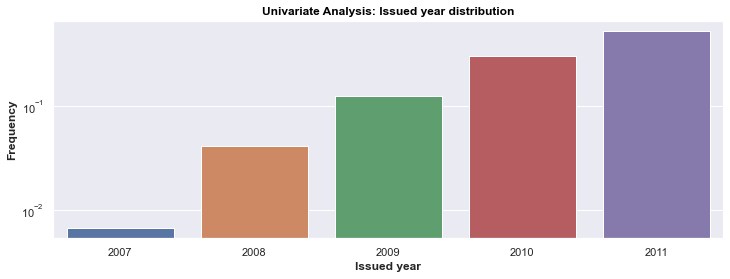

In [71]:
issue_d_year_data = loans_df.issue_d_year.value_counts(normalize=True).reset_index()
plot_bar(data = issue_d_year_data, xvar = 'index', yvar = 'issue_d_year', xlabel = 'Issued year', 
         ylabel = 'Frequency', title = 'Univariate Analysis: Issued year distribution', 
         fig_size = (12, 4), fontscale = 1, yscale='Log')

#### Analysis
Every year the loan requests are growing steadily

#### Issued Month (IssuedYear)


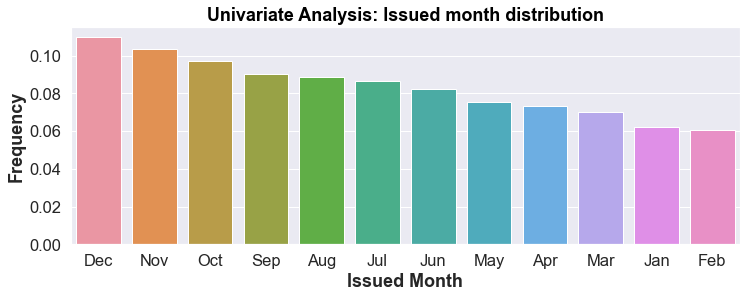

In [72]:
issue_d_mnth_data = loans_df.issue_d_month.value_counts(normalize=True).reset_index()
plot_bar(data = issue_d_mnth_data, xvar = 'index', yvar = 'issue_d_month', xlabel = 'Issued Month', 
         ylabel = 'Frequency', title = 'Univariate Analysis: Issued month distribution', 
         fig_size = (12, 4), fontscale = 1.5)

#### Analysis
1. December month is the month where highest loans were funded and February being lowest
2. Most of the funds were released in holiday season Nov - Dec

## Univariate Analysis - Segmented 

-  For segmented univariate analysis, using numerical variables with categorical variable to identify different segments.
-  As the target is to identify the defaulters only using the loan status categorical variable to analyse against Interest Rate, Loan amount, Annual income, and DTI

### Loan status v/s Interest Rates

In [73]:
loans_df.int_rate.describe()

count   37,544.00
mean        11.96
std          3.68
min          5.42
25%          8.94
50%         11.83
75%         14.42
max         24.40
Name: int_rate, dtype: float64

In [74]:
# Create the 7 segments for interest rate 
# Create a new derived column 'int_rate_bins' and store the values

loans_df['int_rate_bins'] = pd.cut(loans_df['int_rate'], [0, 6, 9, 12, 15, 18, 21, 25], 
                                labels=['0-6', '6-9', '9-12', '12-15', '15-18','18-21','21-25'])


loans_intrate_filter = loans_df.groupby(['int_rate_bins'])['loan_status'].value_counts().unstack().reset_index()

# Compute the fully paid and charged off percentage
loans_intrate_filter['1_percent'] = (loans_intrate_filter[1] / (loans_intrate_filter[1] + loans_intrate_filter[0]))
loans_intrate_filter['0_percent'] = (loans_intrate_filter[0] / (loans_intrate_filter[1] + loans_intrate_filter[0]))
print (loans_intrate_filter[['int_rate_bins', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_intrate_filter[['int_rate_bins', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status int_rate_bins  0_percent
0                     0-6       0.96
1                     6-9       0.94
2                    9-12       0.88
3                   12-15       0.84
4                   15-18       0.77
5                   18-21       0.69
6                   21-25       0.56
------------------------------------------
loan_status int_rate_bins  1_percent
6                   21-25       0.44
5                   18-21       0.31
4                   15-18       0.23
3                   12-15       0.16
2                    9-12       0.12
1                     6-9       0.06
0                     0-6       0.04


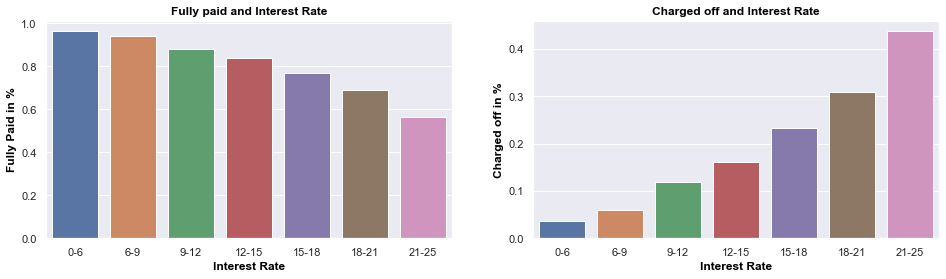

In [75]:
plot_barplots_sidebyside(loans_intrate_filter, xvar = 'int_rate_bins', y1var = '0_percent', y2var = '1_percent',
                         xlabel = 'Interest Rate', y1label = 'Fully Paid in %', y2label = 'Charged off in %', 
                         title1 = 'Fully paid and Interest Rate', title2 = 'Charged off and Interest Rate',
                         fig_size=(16,4), fontscale=1)

### Observation

- Higher the interest rate higher the chances of being charged off. 

### Loan status v/s Loan Amount

In [76]:
# Create 4 segments for loan amount by using q cut 4 quartiles

qcut_series , qcut_intervals= pd.qcut(loans_df.loan_amnt, q=4,
                                      labels=['low','medium', 'high', 'very high'],
                                      retbins=True)

# Create a new derived column 'loan_amnt_bins'

loans_df['loan_amnt_bins'] = qcut_series

# Compute the fully paid and charged off percentage

loans_loanamt_filter = loans_df.groupby(['loan_amnt_bins'])['loan_status'].value_counts().unstack().reset_index()
loans_loanamt_filter['1_percent'] = (loans_intrate_filter[1] / (loans_intrate_filter[1] + loans_intrate_filter[0]))
loans_loanamt_filter['0_percent'] = (loans_intrate_filter[0] / (loans_intrate_filter[1] + loans_intrate_filter[0]))
print (loans_loanamt_filter[['loan_amnt_bins', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_loanamt_filter[['loan_amnt_bins', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status loan_amnt_bins  0_percent
0                      low       0.96
1                   medium       0.94
2                     high       0.88
3                very high       0.84
------------------------------------------
loan_status loan_amnt_bins  1_percent
3                very high       0.16
2                     high       0.12
1                   medium       0.06
0                      low       0.04


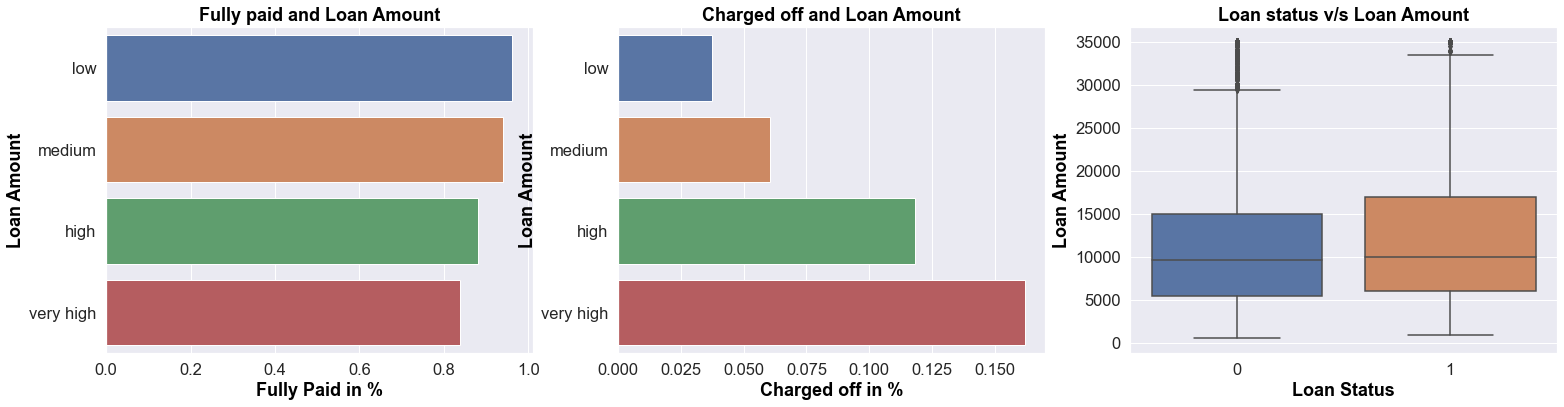

In [77]:
# Plot the graphs
plt.figure(figsize=(26,6))
sns.set(font_scale=1.5) 
# subplot 1
plt.subplot(1, 3, 1)
fig_1 = sns.barplot(y='loan_amnt_bins', x='0_percent', data=loans_loanamt_filter)
fig_1.set_title('Fully paid and Loan Amount',color='black',fontweight='bold')
fig_1.set_ylabel('Loan Amount', color='black',fontweight='bold')
fig_1.set_xlabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(1, 3, 2)
fig_2 = sns.barplot(y='loan_amnt_bins', x='1_percent', data=loans_loanamt_filter)
fig_2.set_title('Charged off and Loan Amount',color='black',fontweight='bold')
fig_2.set_ylabel('Loan Amount', color='black',fontweight='bold')
fig_2.set_xlabel('Charged off in %' ,color='black',fontweight='bold')

plt.subplot(1, 3, 3)
#plt.title('Loan status vs Loan amount')
fig_3 = sns.boxplot(x=loans_df.loan_status, y=loans_df.loan_amnt, data=loans_df)
fig_3.set_title('Loan status v/s Loan Amount',color='black',fontweight='bold')
fig_3.set_ylabel('Loan Amount', color='black',fontweight='bold')
fig_3.set_xlabel('Loan Status' ,color='black',fontweight='bold')

plt.show()

### Observation

- Higher the loan amount higher the chances of being charged off
- No significant change in quantitative measures

### Loan status v/s Annual income

In [78]:
# Create 4 segments for Annual Income by using q cut 4 quartiles

qcut_series , qcut_intervals= pd.qcut(loans_df.annual_inc, q=4,
                                      labels=['low','medium', 'high', 'very high'],
                                      retbins=True)

loans_df['ann_inc_bins'] = qcut_series

# Compute the fully paid and charged off percentage

ann_inc_filter = loans_df.groupby(['ann_inc_bins'])['loan_status'].value_counts().unstack().reset_index()
ann_inc_filter['1_percent'] = (ann_inc_filter[1] / (ann_inc_filter[1] + ann_inc_filter[0]))
ann_inc_filter['0_percent'] = (ann_inc_filter[0] / (ann_inc_filter[1] + ann_inc_filter[0]))
print (ann_inc_filter[['ann_inc_bins', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (ann_inc_filter[['ann_inc_bins', '1_percent']].sort_values(('1_percent'), ascending=False))


loan_status ann_inc_bins  0_percent
3              very high       0.89
2                   high       0.87
1                 medium       0.85
0                    low       0.82
------------------------------------------
loan_status ann_inc_bins  1_percent
0                    low       0.18
1                 medium       0.15
2                   high       0.13
3              very high       0.11


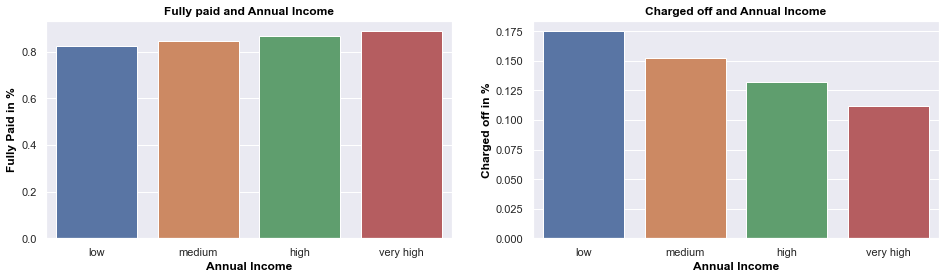

In [79]:
plot_barplots_sidebyside(data = ann_inc_filter, xvar = 'ann_inc_bins', y1var = '0_percent', y2var = '1_percent',
                         xlabel = 'Annual Income', y1label = 'Fully Paid in %', y2label = 'Charged off in %', 
                         title1 = 'Fully paid and Annual Income', title2 = 'Charged off and Annual Income',
                         fig_size=(16,4), fontscale=1)

### Observation

- Lower the annual income higher the chances of being charged off 

### Loan status v/s DTI

In [80]:
qcut_series , qcut_intervals= pd.qcut(loans_df.dti, q=4,
                                      labels=['low','medium', 'high', 'very high'],
                                      retbins=True)

loans_df['dti_bins'] = qcut_series

# Compute the fully paid and charged off percentage

dti_filter = loans_df.groupby(['dti_bins'])['loan_status'].value_counts().unstack().reset_index()
dti_filter['1_percent'] = (dti_filter[1] / (dti_filter[1] + dti_filter[0]))
dti_filter['0_percent'] = (dti_filter[0] / (dti_filter[1] + dti_filter[0]))
print (dti_filter[['dti_bins', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (dti_filter[['dti_bins', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status   dti_bins  0_percent
0                  low       0.88
1               medium       0.86
2                 high       0.85
3            very high       0.84
------------------------------------------
loan_status   dti_bins  1_percent
3            very high       0.16
2                 high       0.15
1               medium       0.14
0                  low       0.12


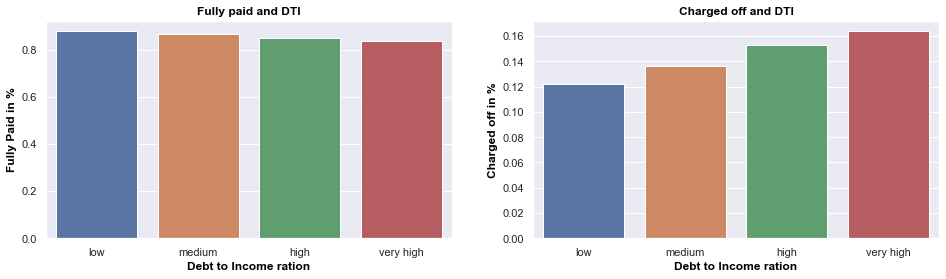

In [81]:
plot_barplots_sidebyside(data = dti_filter, xvar = 'dti_bins', y1var = '0_percent', y2var = '1_percent',
                         xlabel = 'Debt to Income ration', y1label = 'Fully Paid in %', y2label = 'Charged off in %', 
                         title1 = 'Fully paid and DTI', title2 = 'Charged off and DTI',
                         fig_size=(16,4), fontscale=1)

### Observation

- For fully paid applicants, there is no siginifant variance seen with DTI.
- Charged off customers have obvious correlation with DTI. Higher the DTI have more defaulters chances 

## Bi Variate  -  Categorical Analysis

### Loan status v/s Term

In [82]:
loans_term_filter = loans_df.groupby(['term'])['loan_status'].value_counts().unstack().reset_index()
loans_term_filter['1_percent'] = (loans_term_filter[1] / (loans_term_filter[1] + loans_term_filter[0]))
loans_term_filter['0_percent'] = (loans_term_filter[0] / (loans_term_filter[1] + loans_term_filter[0]))
print (loans_term_filter[['term', '0_percent']].sort_values(('0_percent'), ascending=False))
print (loans_term_filter[['term', '1_percent']].sort_values(('1_percent'), ascending=True))

loan_status  term  0_percent
0              36       0.89
1              60       0.75
loan_status  term  1_percent
0              36       0.11
1              60       0.25


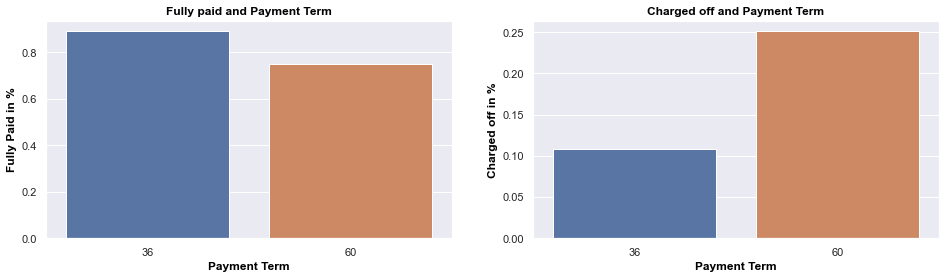

In [83]:
plot_barplots_sidebyside(data = loans_term_filter, xvar = 'term', y1var = '0_percent', y2var = '1_percent',
                         xlabel = 'Payment Term', y1label = 'Fully Paid in %', y2label = 'Charged off in %', 
                         title1 = 'Fully paid and Payment Term', title2 = 'Charged off and Payment Term',
                         fig_size=(16,4), fontscale=1)

### Observation

- Those who have payment term as 60 months have for higher chance (25%) of being charged off 

### Conclusion

- Term does help to form a correlation with being defaulters, however its a weak factor

### Loan status v/s Grade and Sub Grade

In [84]:
# Relationship between Grade and Target variable loan_status = 1 a.k.a chargeoff

loans_grade_filter = loans_df.groupby(['grade'])['loan_status'].value_counts().unstack().reset_index()
loans_grade_filter['1_percent'] = (loans_grade_filter[1] / (loans_grade_filter[1] + loans_grade_filter[0]))
loans_grade_filter['0_percent'] = (loans_grade_filter[0] / (loans_grade_filter[1] + loans_grade_filter[0]))
print (loans_grade_filter[['grade', '0_percent']].sort_values(('0_percent'), ascending=False))
print (loans_grade_filter[['grade', '1_percent']].sort_values(('1_percent'), ascending=True))

loan_status grade  0_percent
0               A       0.94
1               B       0.88
2               C       0.83
3               D       0.78
4               E       0.73
5               F       0.67
6               G       0.66
loan_status grade  1_percent
0               A       0.06
1               B       0.12
2               C       0.17
3               D       0.22
4               E       0.27
5               F       0.33
6               G       0.34


In [85]:
# Relationship between Sub Grade and Target variable loan_status = 1 a.k.a chargeoff

loans_subgrade_filter = loans_df.groupby(['sub_grade'])['loan_status'].value_counts().unstack().reset_index()
loans_subgrade_filter['1_percent'] = (loans_subgrade_filter[1] / (loans_subgrade_filter[1] + loans_subgrade_filter[0]))
loans_subgrade_filter['0_percent'] = (loans_subgrade_filter[0] / (loans_subgrade_filter[1] + loans_subgrade_filter[0]))
print (loans_subgrade_filter[['sub_grade', '0_percent']].sort_values(('0_percent'), ascending=False).head(3))
print (loans_subgrade_filter[['sub_grade', '1_percent']].sort_values(('1_percent'), ascending=False).head(3))

loan_status sub_grade  0_percent
0                  A1       0.98
1                  A2       0.95
2                  A3       0.95
loan_status sub_grade  1_percent
29                 F5       0.48
32                 G3       0.42
31                 G2       0.36


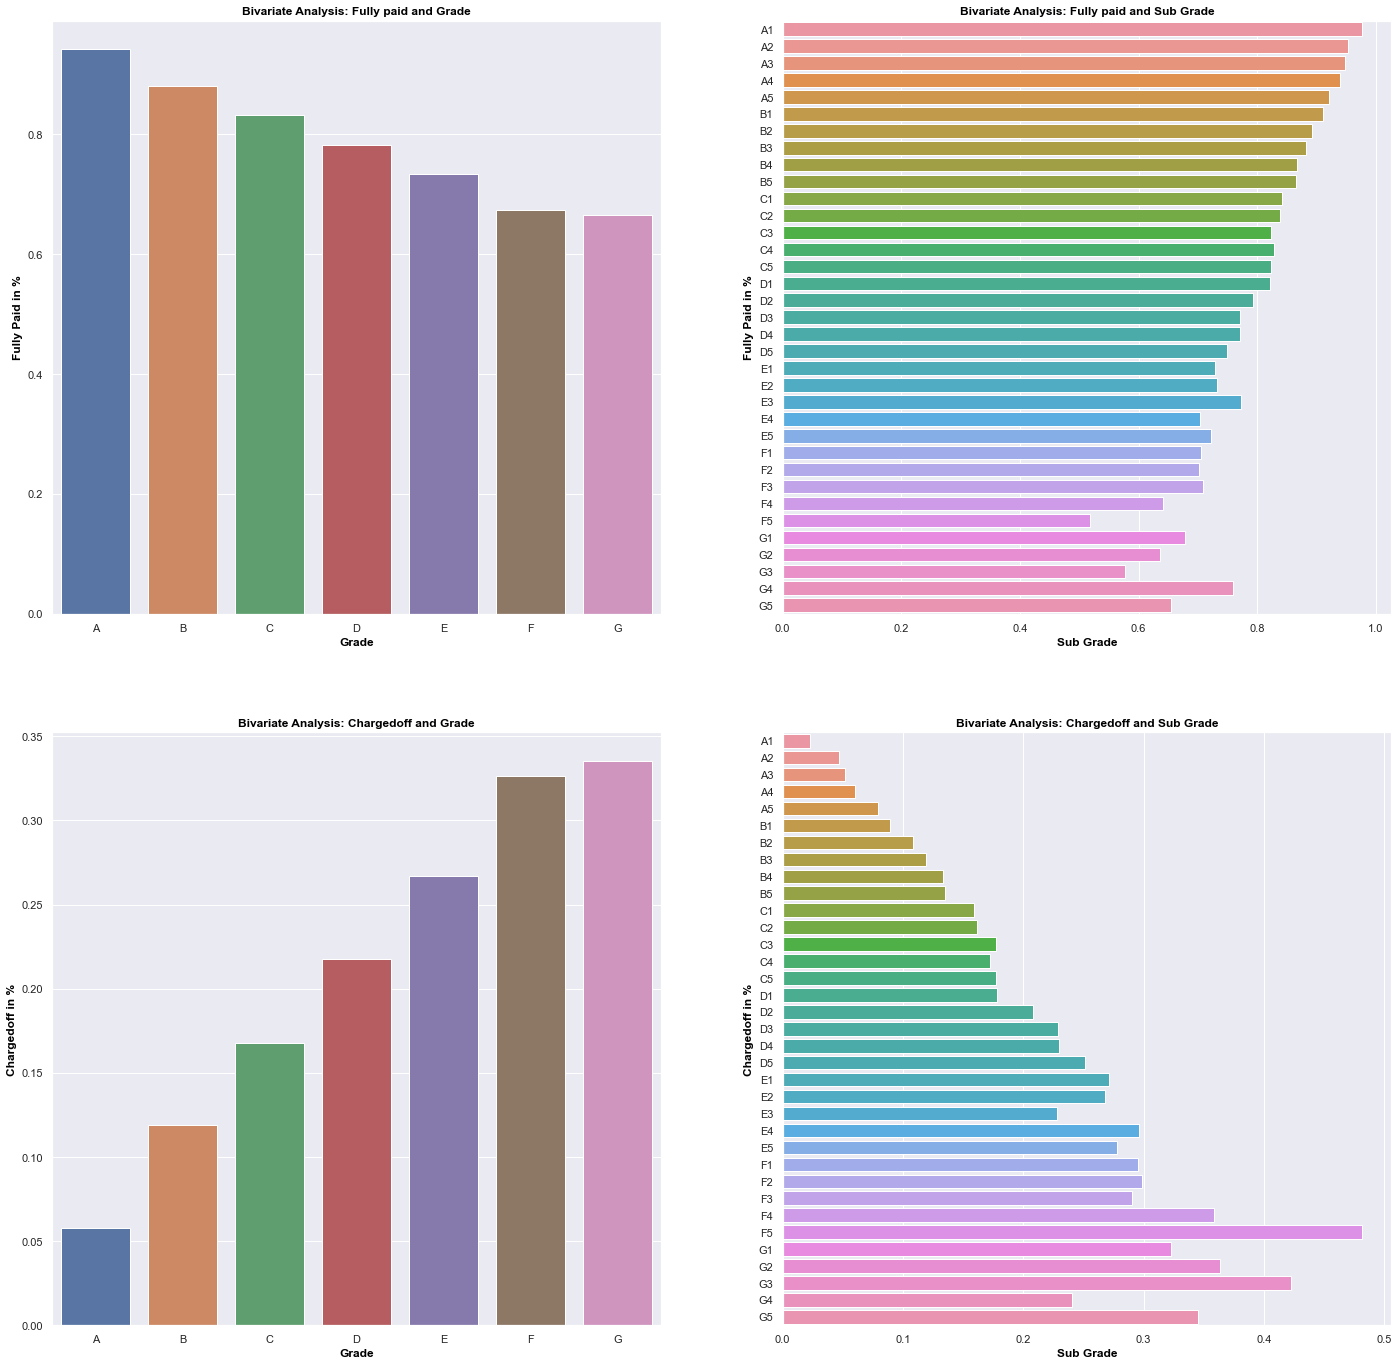

In [86]:
plt.figure(figsize=(24,24))

# subplot 1
plt.subplot(2, 2, 1)
fig_1 = sns.barplot(x='grade', y='0_percent', data=loans_grade_filter)
fig_1.set_title('Bivariate Analysis: Fully paid and Grade',color='black',fontweight='bold')
fig_1.set_xlabel('Grade', color='black',fontweight='bold')
fig_1.set_ylabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(2, 2, 2)
fig_2 = sns.barplot(y='sub_grade', x='0_percent', data=loans_subgrade_filter)
fig_2.set_title('Bivariate Analysis: Fully paid and Sub Grade',color='black',fontweight='bold')
fig_2.set_xlabel('Sub Grade', color='black',fontweight='bold')
fig_2.set_ylabel('Fully Paid in %' ,color='black',fontweight='bold')

# subplot 3
plt.subplot(2, 2, 3)
fig_3 = sns.barplot(x='grade', y='1_percent', data=loans_grade_filter)
fig_3.set_title('Bivariate Analysis: Chargedoff and Grade',color='black',fontweight='bold')
fig_3.set_xlabel('Grade', color='black',fontweight='bold')
fig_3.set_ylabel('Chargedoff in %' ,color='black',fontweight='bold')

# subplot 4
plt.subplot(2, 2, 4)
fig_4 = sns.barplot(y='sub_grade', x='1_percent', data=loans_subgrade_filter)
fig_4.set_title('Bivariate Analysis: Chargedoff and Sub Grade',color='black',fontweight='bold')
fig_4.set_xlabel('Sub Grade', color='black',fontweight='bold')
fig_4.set_ylabel('Chargedoff in %' ,color='black',fontweight='bold')

plt.show()

#### Analysis
##### Grade
- <b>Grade "A"</b> has <b>high percentage of Fully paid </b> which is <b>94% </b> thus low probability of being charged off
- <b>Grade "G"</b> has <b>less percentage of Fully paid </b>which is <b>34% </b> thus high probability of being charged off

##### Sub Grade
- Top <b>3 sub grades</b> which has <b>high chance</b> of being <b>charged off</b>
1. <b>Sub Grade "F5" </b> has <b>48%</b> chance of being Charged off  
2. <b>Sub Grade "G3" </b> has <b>42%</b> chance of being Charged off  
3. <b>Sub Grade "G2" </b> has <b>36%</b> chance of being Charged off

- Top <b>3 sub grades</b> which has <b>high chance</b> of being <b>Fully paid</b>
1. <b>Sub Grade "A1" </b> has <b>97%</b> chance of being Fully paid  
2. <b>Sub Grade "A2" </b> has <b>95%</b> chance of being Fully paid  
3. <b>Sub Grade "A3" </b> has <b>94%</b> chance of being Fully paid

#### Key observation
1. <b> F5 </b> is been showing a significant percentage change within F grade in comparision to other sub grades.
2. <b> Grade </b> as a whole covers the sub-grade range as well to identify the potential defaulters. Hence will recommend to use grade parameter as one of the driving factors

### Conclusion

- Grade parameter is a strong driving factor to identify the defaulters.
- Grade does influence the interest rate so the cascading effects are much deeper

### Loan status v/s Employee Length

In [87]:
loans_emplen_filter = loans_df.groupby(['emp_length'])['loan_status'].value_counts().unstack().reset_index()
loans_emplen_filter['1_percent'] = (loans_emplen_filter[1] / (loans_emplen_filter[1] + loans_emplen_filter[0]))
loans_emplen_filter['0_percent'] = (loans_emplen_filter[0] / (loans_emplen_filter[1] + loans_emplen_filter[0]))
print (loans_emplen_filter[['emp_length', '0_percent']].sort_values(('0_percent'), ascending=False))
print (loans_emplen_filter[['emp_length', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status  emp_length  0_percent
9                  9.00       0.87
2                  2.00       0.87
4                  4.00       0.86
3                  3.00       0.86
8                  8.00       0.86
6                  6.00       0.86
0                  0.50       0.86
5                  5.00       0.86
1                  1.00       0.86
7                  7.00       0.85
10                10.50       0.84
loan_status  emp_length  1_percent
10                10.50       0.16
7                  7.00       0.15
1                  1.00       0.14
5                  5.00       0.14
0                  0.50       0.14
6                  6.00       0.14
8                  8.00       0.14
3                  3.00       0.14
4                  4.00       0.14
2                  2.00       0.13
9                  9.00       0.13


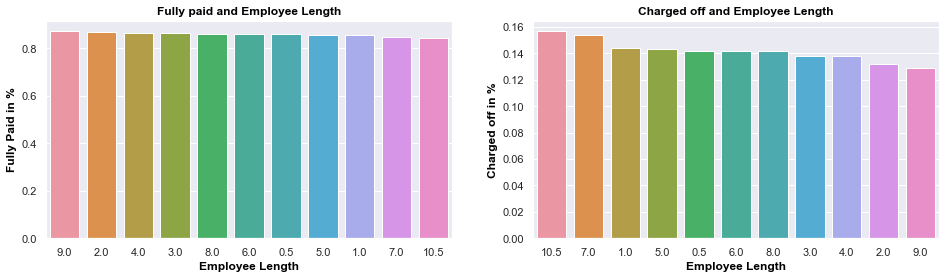

In [88]:
plot_barplots_sidebyside(data = loans_emplen_filter, xvar = 'emp_length', y1var = '0_percent', y2var = '1_percent',
                         xlabel = 'Employee Length', y1label = 'Fully Paid in %', y2label = 'Charged off in %', 
                         title1 = 'Fully paid and Employee Length', title2 = 'Charged off and Employee Length',
                         fig_size=(16,4), fontscale=1, 
                         order1 = loans_emplen_filter[['emp_length', '0_percent']].sort_values(('0_percent'), ascending=False).emp_length,
                         order2 = loans_emplen_filter[['emp_length', '1_percent']].sort_values(('1_percent'), ascending=False).emp_length)

### Analysis:
#### Top 4 categories which have high chances of being charged off 
1. <b>10+ years </b> has around <b>16%</b> of chance. 
2. <b>7 years </b> has around <b>15%</b> of chance. 
3. <b>1 years </b> has around <b>14%</b> of chance.
4. <b> < 1 year </b> has around <b>14%</b> of chance.

#### Top 4 categories which have high chances of being fully paid 
1. <b>9 years </b> has around <b>87%</b> of chance. 
2. <b>2 years </b> has around <b>87%</b> of chance. 
3. <b>4 years </b> has around <b>86%</b> of chance.

#### Conclusion
1. Applicants who have 10+ years of experience have high chaces of being charged off, which is around 16% which is counter-intuitive. Normally as per intuition it should be < 1, but we see < 1 year - 3 years all have same range
at the same time Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
2. The higher the experience, higher the salary and higher the needs to improve the style of leaving this could lead to heavy debts.
3. Employee length with other factors like grade and purpose will help to create the strong correlation to identify the defaulters.

### Loan status v/s House Owners

In [89]:
loans_houseown_filter = loans_df.groupby(['home_ownership'])['loan_status'].value_counts().unstack().reset_index()
loans_houseown_filter['1_percent'] = (loans_houseown_filter[1] / (loans_houseown_filter[1] + loans_houseown_filter[0]))
loans_houseown_filter['0_percent'] = (loans_houseown_filter[0] / (loans_houseown_filter[1] + loans_houseown_filter[0]))
loans_houseown_filter = loans_houseown_filter.dropna()
print (loans_houseown_filter[['home_ownership', '0_percent']].sort_values(('0_percent'), ascending=False))
print (loans_houseown_filter[['home_ownership', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status home_ownership  0_percent
0                 MORTGAGE       0.86
3                      OWN       0.86
4                     RENT       0.85
2                    OTHER       0.82
loan_status home_ownership  1_percent
2                    OTHER       0.18
4                     RENT       0.15
3                      OWN       0.14
0                 MORTGAGE       0.14


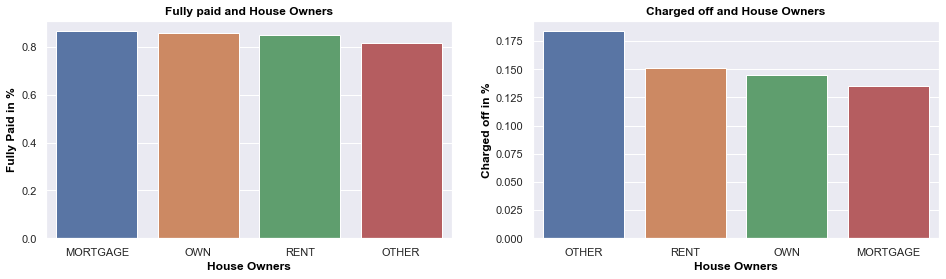

In [90]:
plot_barplots_sidebyside(data = loans_houseown_filter, xvar = 'home_ownership', y1var = '0_percent', y2var = '1_percent',
                         xlabel = 'House Owners', y1label = 'Fully Paid in %', y2label = 'Charged off in %', 
                         title1 = 'Fully paid and House Owners', title2 = 'Charged off and House Owners',
                         fig_size=(16,4), fontscale=1,
                         order1 = loans_houseown_filter[['home_ownership', '0_percent']].sort_values(('0_percent'), ascending=False).home_ownership,
                         order2 = loans_houseown_filter[['home_ownership', '1_percent']].sort_values(('1_percent'), ascending=False).home_ownership,)

### Observation

- The relationship between owning a house and chance of being charged off which is counter intuitive. Reason being it is seen that those who own the house have greater chance of being charged off (15%), same as those who rent, in comparison to those who mortagage (14%)
- Those who mortgage the house have the highest chance paying fully (86%) in comparison to those who own the house which is (85%)
- Those who fall in the other category has the highest chance (18%) of being charged off.

### Loan status v/s Purpose

In [91]:
loans_purpose_filter = loans_df.groupby(['purpose'])['loan_status'].value_counts().unstack().reset_index()
loans_purpose_filter['1_percent'] = (loans_purpose_filter[1] / (loans_purpose_filter[1] + loans_purpose_filter[0]))
loans_purpose_filter['0_percent'] = (loans_purpose_filter[0] / (loans_purpose_filter[1] + loans_purpose_filter[0]))
print (loans_purpose_filter[['purpose', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_purpose_filter[['purpose', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status             purpose  0_percent
13                      wedding       0.90
6                major_purchase       0.90
1                   credit_card       0.90
0                           car       0.89
4              home_improvement       0.88
12                     vacation       0.86
2            debt_consolidation       0.85
8                        moving       0.85
7                       medical       0.85
9                         other       0.84
3                   educational       0.84
5                         house       0.83
10             renewable_energy       0.81
11               small_business       0.73
------------------------------------------
loan_status             purpose  1_percent
11               small_business       0.27
10             renewable_energy       0.19
5                         house       0.17
3                   educational       0.16
9                         other       0.16
7                       medical       0.15
8          

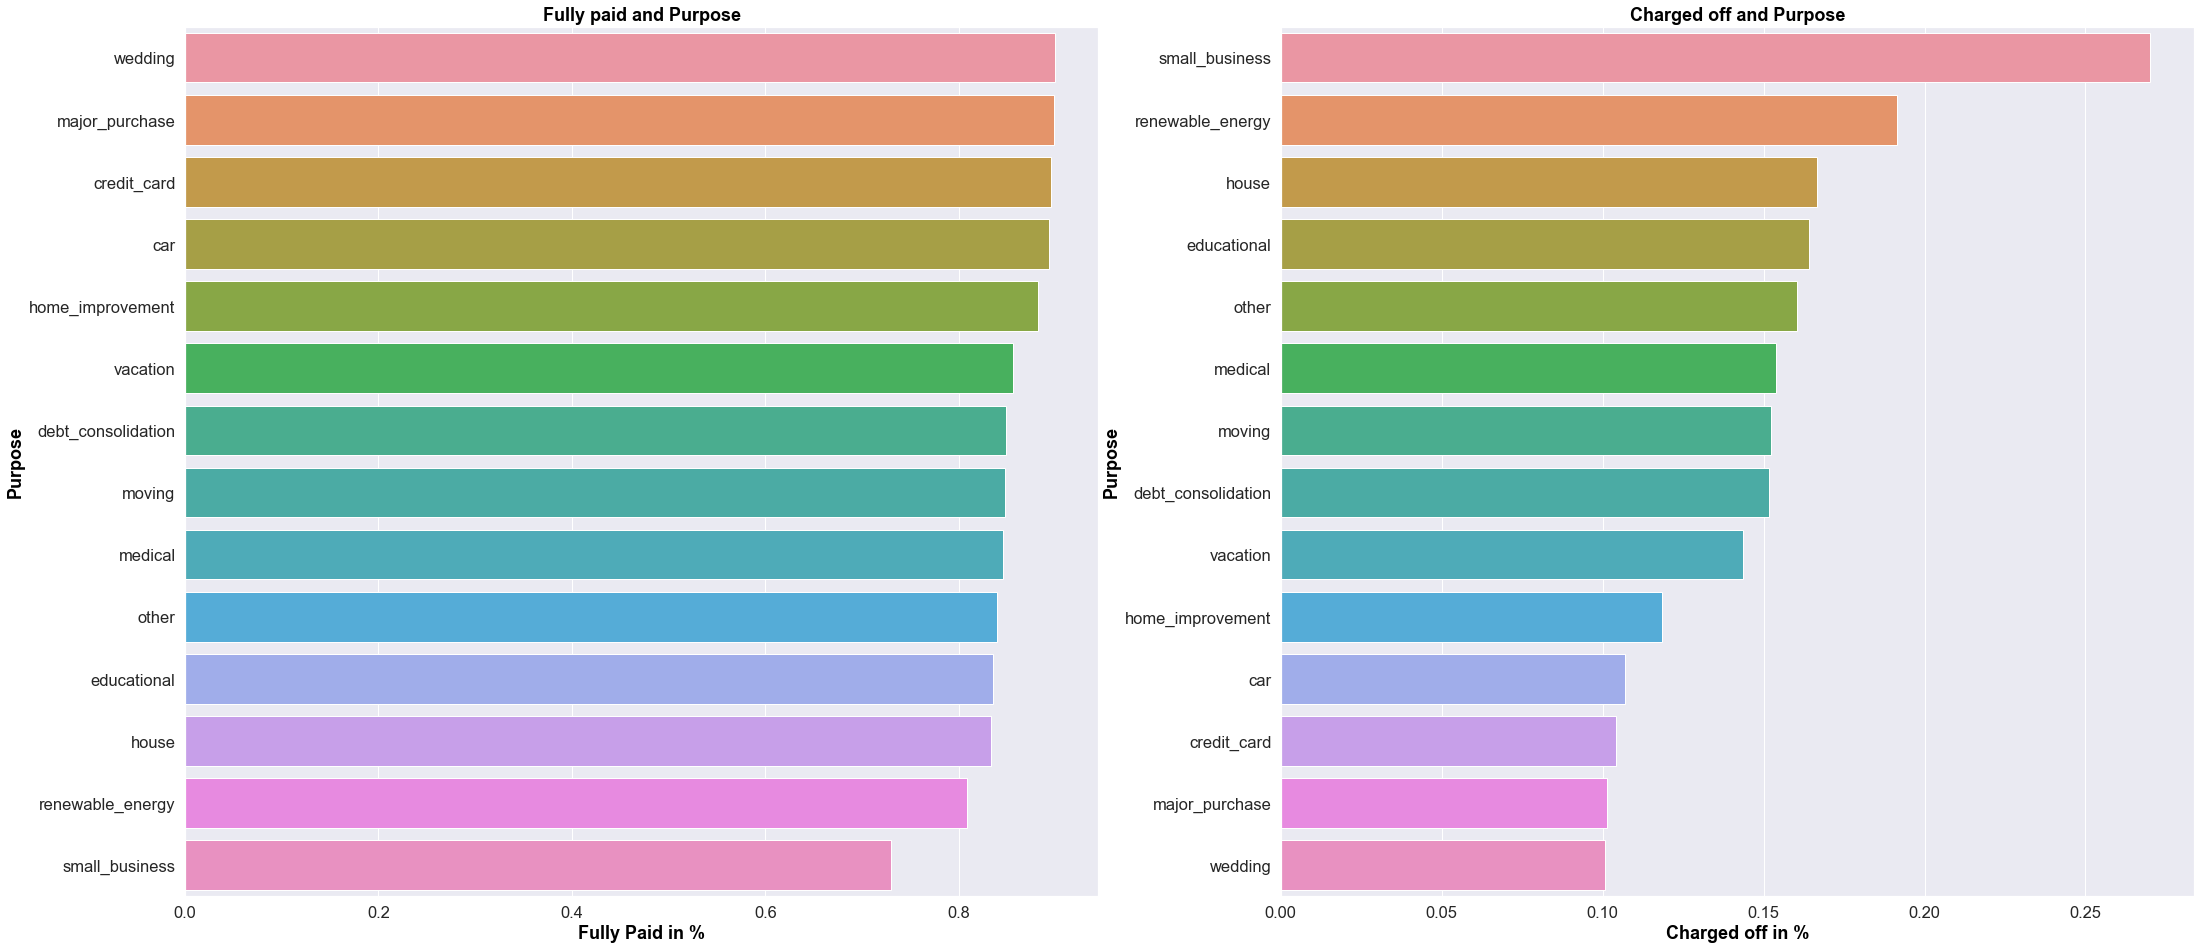

In [92]:
plot_barplots_sidebyside(data = loans_purpose_filter, xvar = 'purpose', y1var = '0_percent', y2var = '1_percent',
                         xlabel = 'Purpose', y1label = 'Fully Paid in %', y2label = 'Charged off in %', 
                         title1 = 'Fully paid and Purpose', title2 = 'Charged off and Purpose',
                         fig_size=(36,16), fontscale=1.5, isvertical=True,
                         order1 = loans_purpose_filter[['purpose', '0_percent']].sort_values(('0_percent'), ascending=False).purpose,
                         order2 = loans_purpose_filter[['purpose', '1_percent']].sort_values(('1_percent'), ascending=False).purpose)

### Observation

- The purpose which has higher chance of being charged off is <b>Small Business (27%)</b> followed by (19%) <b> renewable energy </b> and <b> educational (17%) </b>

### Loan status v/s State

In [93]:
loans_addr_filter = loans_df.groupby(['addr_state'])['loan_status'].value_counts().unstack().reset_index()
loans_addr_filter['1_percent'] = (loans_addr_filter[1] / (loans_addr_filter[1] + loans_addr_filter[0]))
loans_addr_filter['0_percent'] = (loans_addr_filter[0] / (loans_addr_filter[1] + loans_addr_filter[0]))
print (loans_addr_filter[['addr_state', '0_percent']].sort_values(('0_percent'), ascending=False).head(10))
print ("------------------------------------------")
print (loans_addr_filter[['addr_state', '1_percent']].sort_values(('1_percent'), ascending=False).head(10))

loan_status addr_state  0_percent
49                  WY       0.96
7                   DC       0.93
25                  MS       0.89
16                  KS       0.89
8                   DE       0.89
45                  VT       0.89
2                   AR       0.89
41                  TN       0.88
19                  MA       0.88
37                  PA       0.88
------------------------------------------
loan_status addr_state  1_percent
28                  NE       0.60
32                  NV       0.22
0                   AK       0.20
40                  SD       0.18
9                   FL       0.18
11                  HI       0.17
13                  ID       0.17
36                  OR       0.16
24                  MO       0.16
31                  NM       0.16


In [94]:
loans_df.addr_state.value_counts().sort_values()[0:8]

ME     3
IA     5
NE     5
ID     6
IN     9
TN    17
MS    19
VT    53
Name: addr_state, dtype: int64

#### Conclusion : As we are seeing that the samples for some of the states are very less and those are the states which are showing huge percentage as defaulters, removing those low samples to normalize the analysis.

__`Removing the states from list - ME, IA, NE, ID, IN, TN and MS`__

In [95]:
loans_df = loans_df[~(loans_df.addr_state.isin(list((loans_df.addr_state.value_counts().sort_values()[0:7]).index)))]

In [96]:
loans_addr_filter = loans_df.groupby(['addr_state'])['loan_status'].value_counts().unstack().reset_index()
loans_addr_filter['1_percent'] = (loans_addr_filter[1] / (loans_addr_filter[1] + loans_addr_filter[0]))
loans_addr_filter['0_percent'] = (loans_addr_filter[0] / (loans_addr_filter[1] + loans_addr_filter[0]))
print (loans_addr_filter[['addr_state', '0_percent']].sort_values(('0_percent'), ascending=False).head(10))
print ("------------------------------------------")
print (loans_addr_filter[['addr_state', '1_percent']].sort_values(('1_percent'), ascending=False).head(10))

loan_status addr_state  0_percent
42                  WY       0.96
7                   DC       0.93
13                  KS       0.89
8                   DE       0.89
38                  VT       0.89
2                   AR       0.89
16                  MA       0.88
31                  PA       0.88
35                  TX       0.88
1                   AL       0.88
------------------------------------------
loan_status addr_state  1_percent
26                  NV       0.22
0                   AK       0.20
34                  SD       0.18
9                   FL       0.18
11                  HI       0.17
30                  OR       0.16
20                  MO       0.16
25                  NM       0.16
4                   CA       0.16
10                  GA       0.16


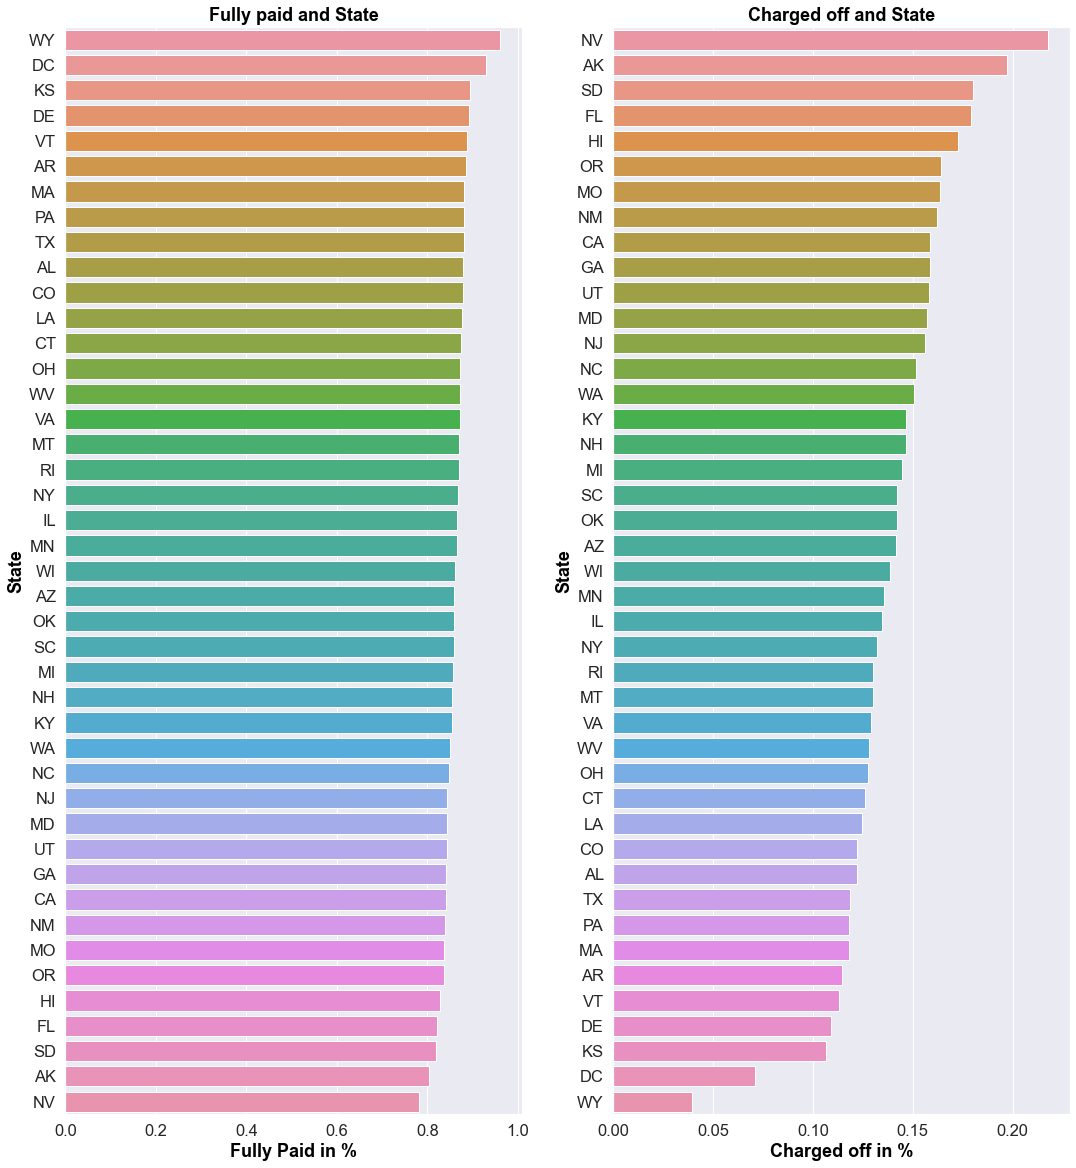

In [97]:
#Sorted the data for fully paid and charged off status. 
plot_barplots_sidebyside(data = loans_addr_filter, xvar = 'addr_state', y1var = '0_percent', y2var = '1_percent',
                         xlabel = 'State', y1label = 'Fully Paid in %', y2label = 'Charged off in %', 
                         title1 = 'Fully paid and State', title2 = 'Charged off and State',
                         fig_size=(18,20), fontscale=1.5, isvertical=True, 
                         order1 = loans_addr_filter[['addr_state', '0_percent']].sort_values(('0_percent'), ascending=False).addr_state,
                         order2 = loans_addr_filter[['addr_state', '1_percent']].sort_values(('1_percent'), ascending=False).addr_state)

### Observation

- The state which has higher chance of being charged off is <b>NV (22%)</b>
- The <b>CA and FL</b> are the amongst top 10 states where total loan applications are higher and also the defaulters are higher. 
- <b>Top 3 states (CA, FL and NY)</b> from where <b>max applications</b> are received are strong cadidates to analyse the defaulters data.

### Loan status v/s Month

In [98]:
loans_month_filter = loans_df.groupby(['issue_d_month'])['loan_status'].value_counts().unstack().reset_index()
loans_month_filter['1_percent'] = (loans_month_filter[1] / (loans_month_filter[1] + loans_month_filter[0]))
loans_month_filter['0_percent'] = (loans_month_filter[0] / (loans_month_filter[1] + loans_month_filter[0]))
print (loans_month_filter[['issue_d_month', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_month_filter[['issue_d_month', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status issue_d_month  0_percent
3                     Feb       0.88
0                     Apr       0.87
7                     Mar       0.87
4                     Jan       0.87
1                     Aug       0.86
5                     Jul       0.86
9                     Nov       0.85
6                     Jun       0.85
10                    Oct       0.85
11                    Sep       0.84
8                     May       0.84
2                     Dec       0.84
------------------------------------------
loan_status issue_d_month  1_percent
2                     Dec       0.16
8                     May       0.16
11                    Sep       0.16
10                    Oct       0.15
6                     Jun       0.15
9                     Nov       0.15
5                     Jul       0.14
1                     Aug       0.14
4                     Jan       0.13
7                     Mar       0.13
0                     Apr       0.13
3                     Feb       

In [99]:
loans_df.issue_d_month.value_counts()

Dec    4111
Nov    3888
Oct    3632
Sep    3392
Aug    3316
Jul    3248
Jun    3090
May    2834
Apr    2748
Mar    2623
Jan    2327
Feb    2271
Name: issue_d_month, dtype: int64

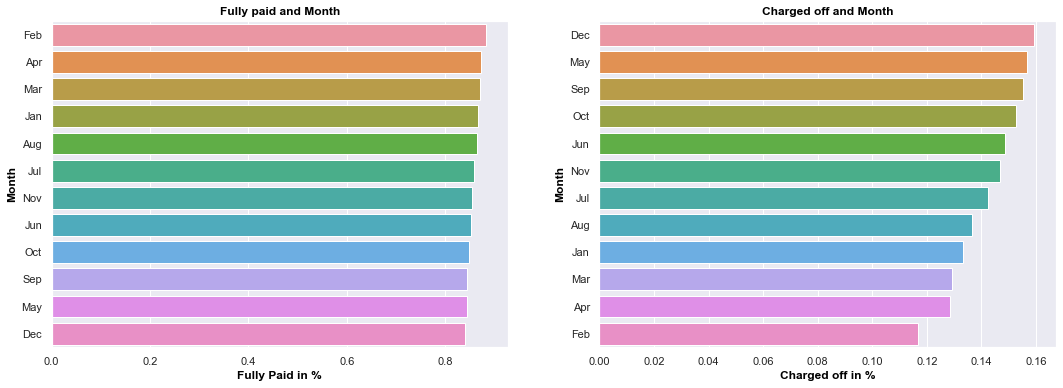

In [100]:
#Sorted the data for fully paid and charged off status. 
plot_barplots_sidebyside(data = loans_month_filter, xvar = 'issue_d_month', y1var = '0_percent', y2var = '1_percent',
                         xlabel = 'Month', y1label = 'Fully Paid in %', y2label = 'Charged off in %', 
                         title1 = 'Fully paid and Month', title2 = 'Charged off and Month',
                         fig_size=(18,6), fontscale=1, isvertical=True, 
                         order1 = loans_month_filter[['issue_d_month', '0_percent']].sort_values(('0_percent'), ascending=False).issue_d_month,
                         order2 = loans_month_filter[['issue_d_month', '1_percent']].sort_values(('1_percent'), ascending=False).issue_d_month)

### Observation

- The month which has higher chance of being charged off is <b>May, September and December (16%)</b> 

### Loan status v/s Verification Status

In [101]:
loans_ver_filter = loans_df.groupby(['verification_status'])['loan_status'].value_counts().unstack().reset_index()
loans_ver_filter['1_percent'] = (loans_ver_filter[1] / (loans_ver_filter[1] + loans_ver_filter[0]))
loans_ver_filter['0_percent'] = (loans_ver_filter[0] / (loans_ver_filter[1] + loans_ver_filter[0]))
print (loans_ver_filter[['verification_status', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_ver_filter[['verification_status', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status verification_status  0_percent
0                  Not Verified       0.87
1               Source Verified       0.85
2                      Verified       0.83
------------------------------------------
loan_status verification_status  1_percent
2                      Verified       0.17
1               Source Verified       0.15
0                  Not Verified       0.13


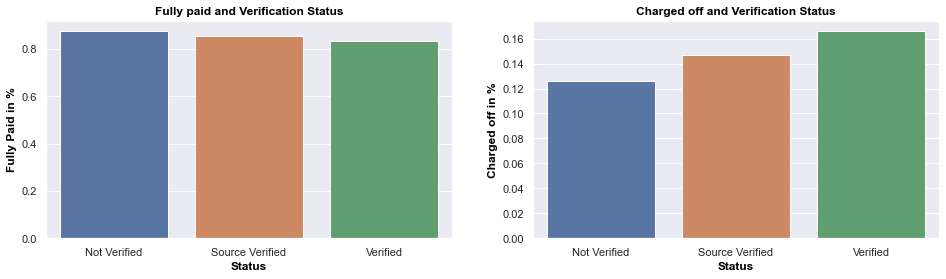

In [102]:
plot_barplots_sidebyside(data = loans_ver_filter, xvar = 'verification_status', y1var = '0_percent', y2var = '1_percent',
                         xlabel = 'Status', y1label = 'Fully Paid in %', y2label = 'Charged off in %', 
                         title1 = 'Fully paid and Verification Status', title2 = 'Charged off and Verification Status',
                         fig_size=(16,4), fontscale=1)

### Observation

- The status which has higher chance of being charged off is <b>Verified (17%)</b> which is counter intuitive which alludes towards Not verified which is lowest

### Conclusion

- Verification status parameter is not a driving factor

### Loan status v/s Bankruptcies

In [103]:
loans_bnkrpcy_filter = loans_df.groupby(['pub_rec_bankruptcies'])['loan_status'].value_counts().unstack().reset_index()
loans_bnkrpcy_filter['1_percent'] = (loans_ver_filter[1] / (loans_ver_filter[1] + loans_ver_filter[0]))
loans_bnkrpcy_filter['0_percent'] = (loans_ver_filter[0] / (loans_ver_filter[1] + loans_ver_filter[0]))
print (loans_bnkrpcy_filter[['pub_rec_bankruptcies', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_bnkrpcy_filter[['pub_rec_bankruptcies', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status  pub_rec_bankruptcies  0_percent
0                            0.00       0.87
1                            1.00       0.85
2                            2.00       0.83
------------------------------------------
loan_status  pub_rec_bankruptcies  1_percent
2                            2.00       0.17
1                            1.00       0.15
0                            0.00       0.13


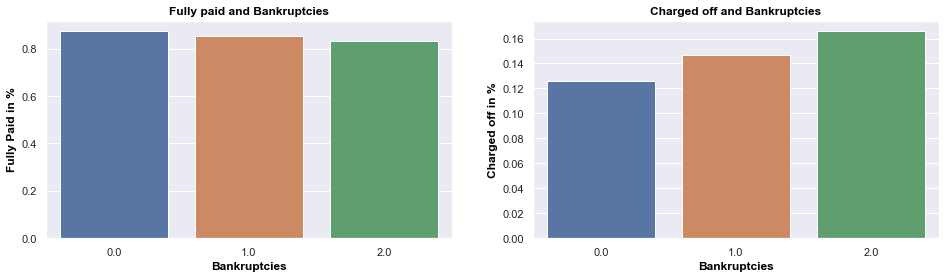

In [104]:
plot_barplots_sidebyside(data = loans_bnkrpcy_filter, xvar = 'pub_rec_bankruptcies', y1var = '0_percent', y2var = '1_percent',
                         xlabel = 'Bankruptcies', y1label = 'Fully Paid in %', y2label = 'Charged off in %', 
                         title1 = 'Fully paid and Bankruptcies', title2 = 'Charged off and Bankruptcies',
                         fig_size=(16,4), fontscale=1)

### Analysis

- Those who have public record of Bankruptcies of 2.0 has (17%) of chance for being charged off
- Those who have no  public record too have (14%) of chance for being charged off

### Conclusion

- Public record of bankcrupties parameter is not a driving factor

### Relationship between quantitative measures

<Figure size 8640x8640 with 0 Axes>

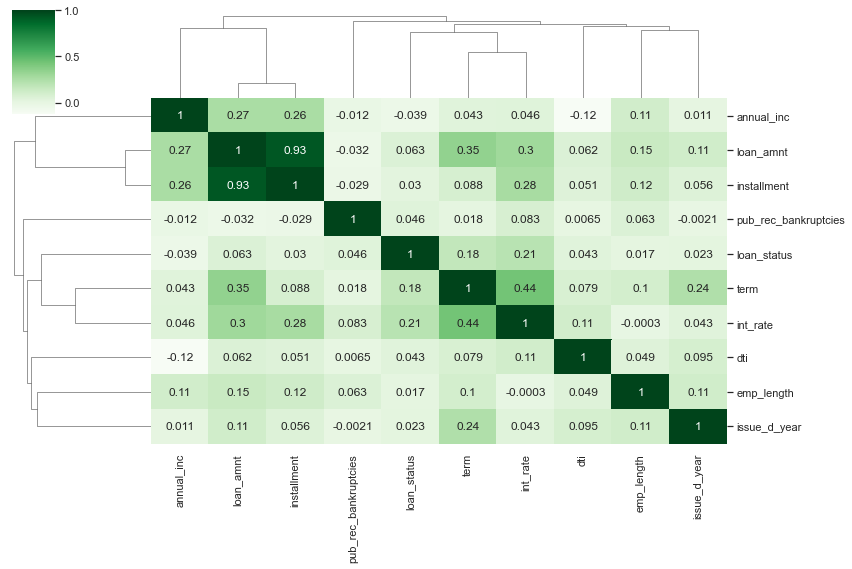

In [105]:
plt.figure(figsize=(120,120))
sns.set(font_scale=1)
sns.clustermap(loans_df.corr(), cmap="Greens", annot=True,figsize=(12, 8))
plt.show()

### Observation
- Loan Amount to Installment got high correlation 
- Annual income to DTI has negative  correlation
- Loan Status to Annual income has negative correlation

### Bivariate Analysis - Loan Amount

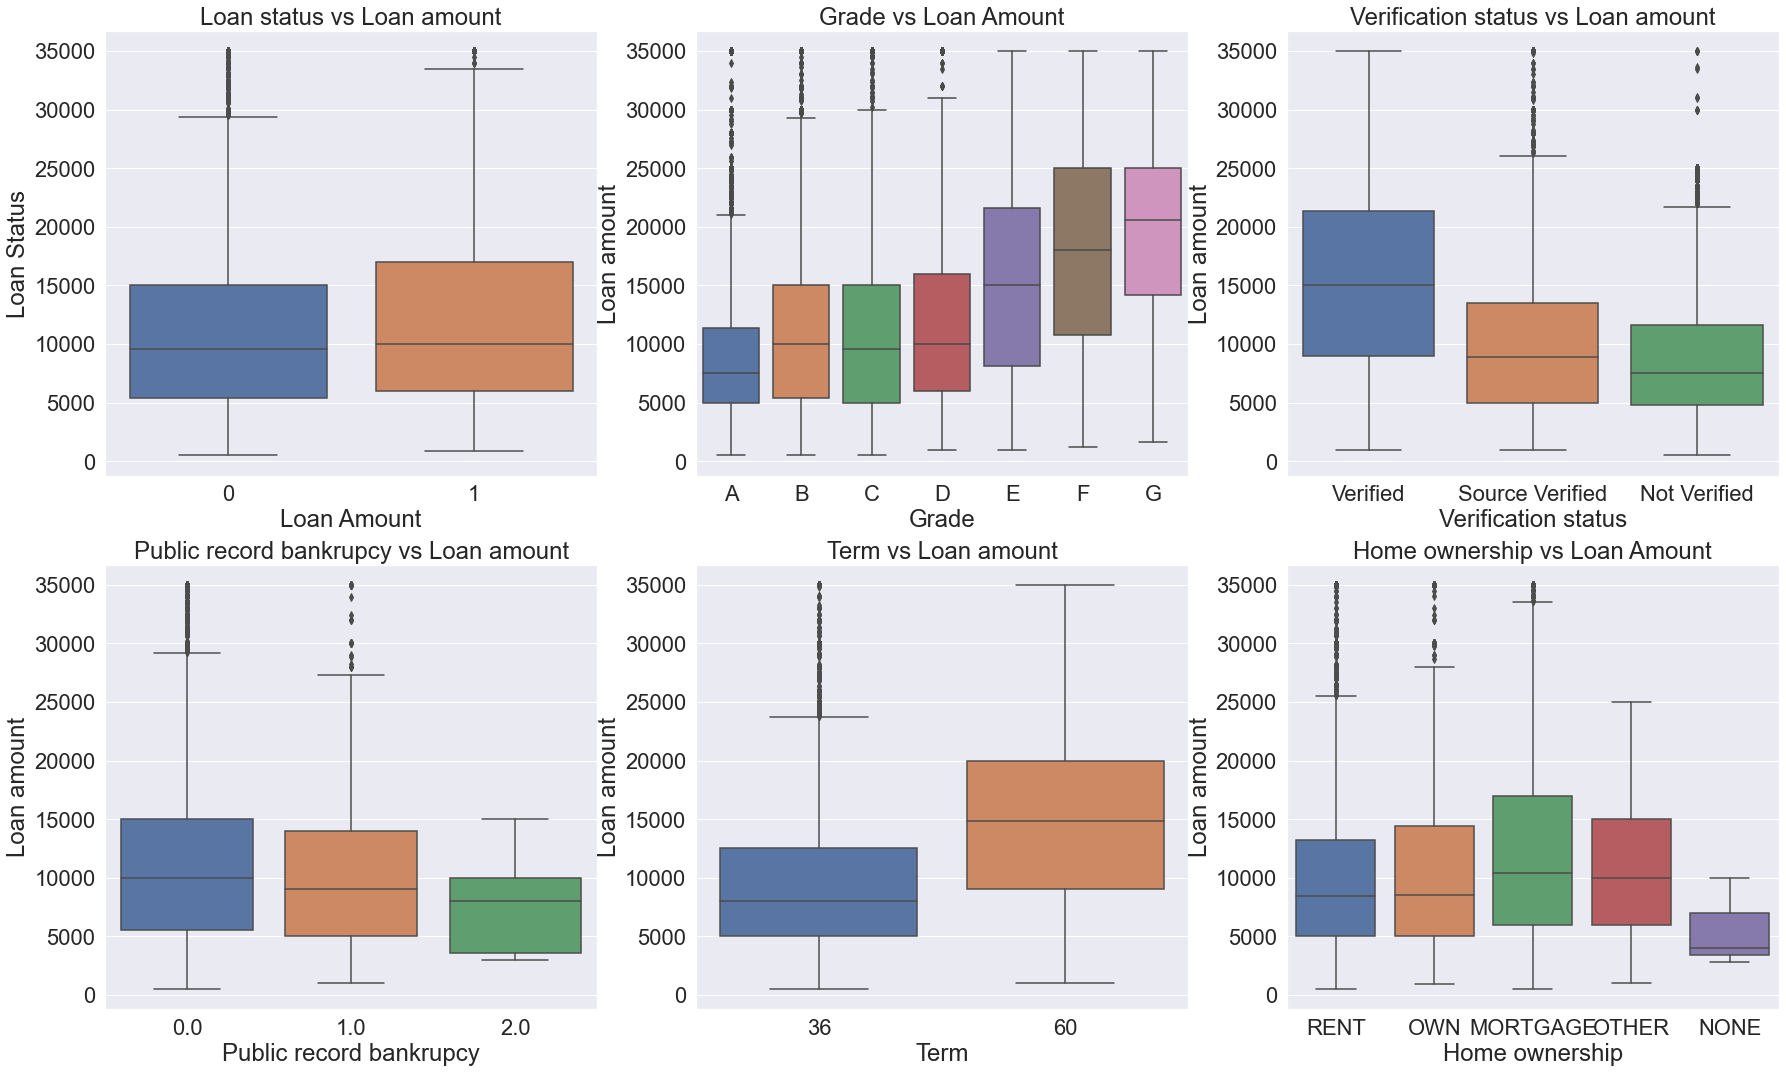

In [106]:
plt.figure(figsize=(30,18))
sns.set(font_scale=2) 

plt.subplot(2, 3, 1)
plt.title('Loan status vs Loan amount')
fig_1 = sns.boxplot(x=loans_df.loan_status, y=loans_df.loan_amnt, data=loans_df)
fig_1.set(xlabel = 'Loan Amount', ylabel='Loan Status')

plt.subplot(2,3,2)
plt.title('Grade vs Loan Amount')
grade_order = loans_df.grade.unique() #  Find the unique items in grade
grade_order.sort() # Sort the values 
fig_2 = sns.boxplot(x=loans_df.grade, y=loans_df.loan_amnt, order = grade_order, data=loans_df)
fig_2.set(xlabel = 'Grade', ylabel='Loan amount')

plt.subplot(2, 3, 3)
plt.title('Verification status vs Loan amount')
fig_3 = sns.boxplot(x=loans_df.verification_status, y=loans_df.loan_amnt, data=loans_df)
fig_3.set(xlabel = 'Verification status', ylabel='Loan amount')

plt.subplot(2, 3, 4)
plt.title('Public record bankrupcy vs Loan amount')
fig_4 = sns.boxplot(x=loans_df.pub_rec_bankruptcies, y=loans_df.loan_amnt, data=loans_df)
fig_4.set(xlabel = 'Public record bankrupcy', ylabel='Loan amount')

#plt.figure(figsize=(18,4))
#sns.set(font_scale=1.5) 

plt.subplot(2, 3, 5)
plt.title('Term vs Loan amount')
fig_5 = sns.boxplot(x=loans_df.term, y=loans_df.loan_amnt, data=loans_df)
fig_5.set(xlabel = 'Term', ylabel='Loan amount')

plt.subplot(2,3,6)
plt.title('Home ownership vs Loan Amount')
fig_6 = sns.boxplot(x=loans_df.home_ownership, y=loans_df.loan_amnt, data=loans_df)
fig_6.set(xlabel = 'Home ownership', ylabel='Loan amount')

plt.show()


#### Analysis
1. No significant relation between defautlers and loan amount
2. Lower the grade higher the loan amount and we have seen with earlier analysis of grade that the lower graders are prone to be defaulters. Grade is clearly a driving factor.
3. Loan amount is higher on the group of applicants who are verified 
4. Higher loan amount for the people who either 0 or 1.0 bankrupcy record
5. Loan amount is seen more for 60 months term. This observsation is obvious.
6. The mortgage and other ownership type applicant are opting for higher loans.

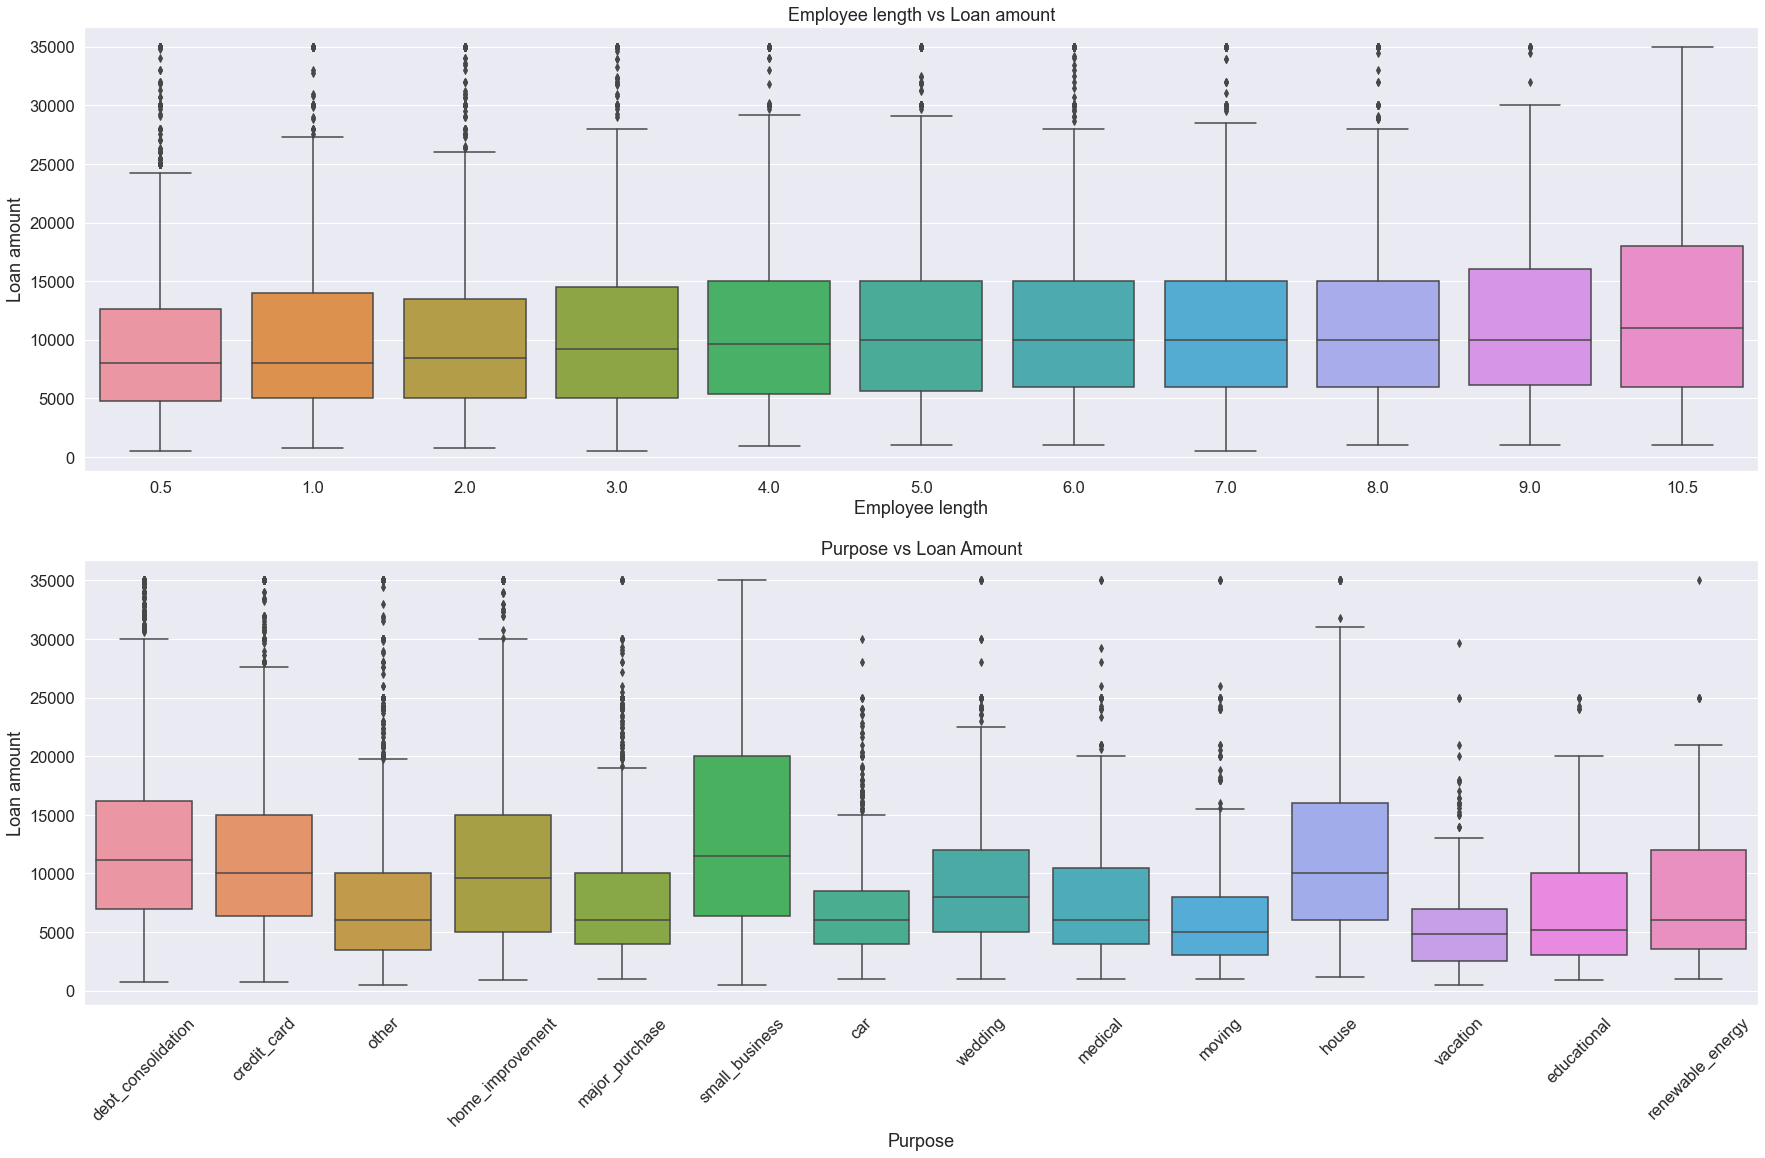

In [107]:
plt.figure(figsize=(30,18))
sns.set(font_scale=1.5) 

plt.subplot(2, 1, 1)
plt.title('Employee length vs Loan amount')
fig_1 = sns.boxplot(x=loans_df.emp_length, y=loans_df.loan_amnt, data=loans_df)
fig_1.set(xlabel = 'Employee length', ylabel='Loan amount')

plt.subplot(2,1,2)
plt.title('Purpose vs Loan Amount')
purpose_order = loans_df.purpose.value_counts().sort_values(ascending=False)
fig_2 = sns.boxplot(x=loans_df.purpose, y=loans_df.loan_amnt, order = purpose_order.index, data=loans_df)
fig_2.set(xlabel = 'Purpose', ylabel='Loan amount')
plt.xticks(rotation=45)
plt.show()

#### Analysis
1. Direct relation between employee length and loan amount.
2. Higher loan amounts for small business

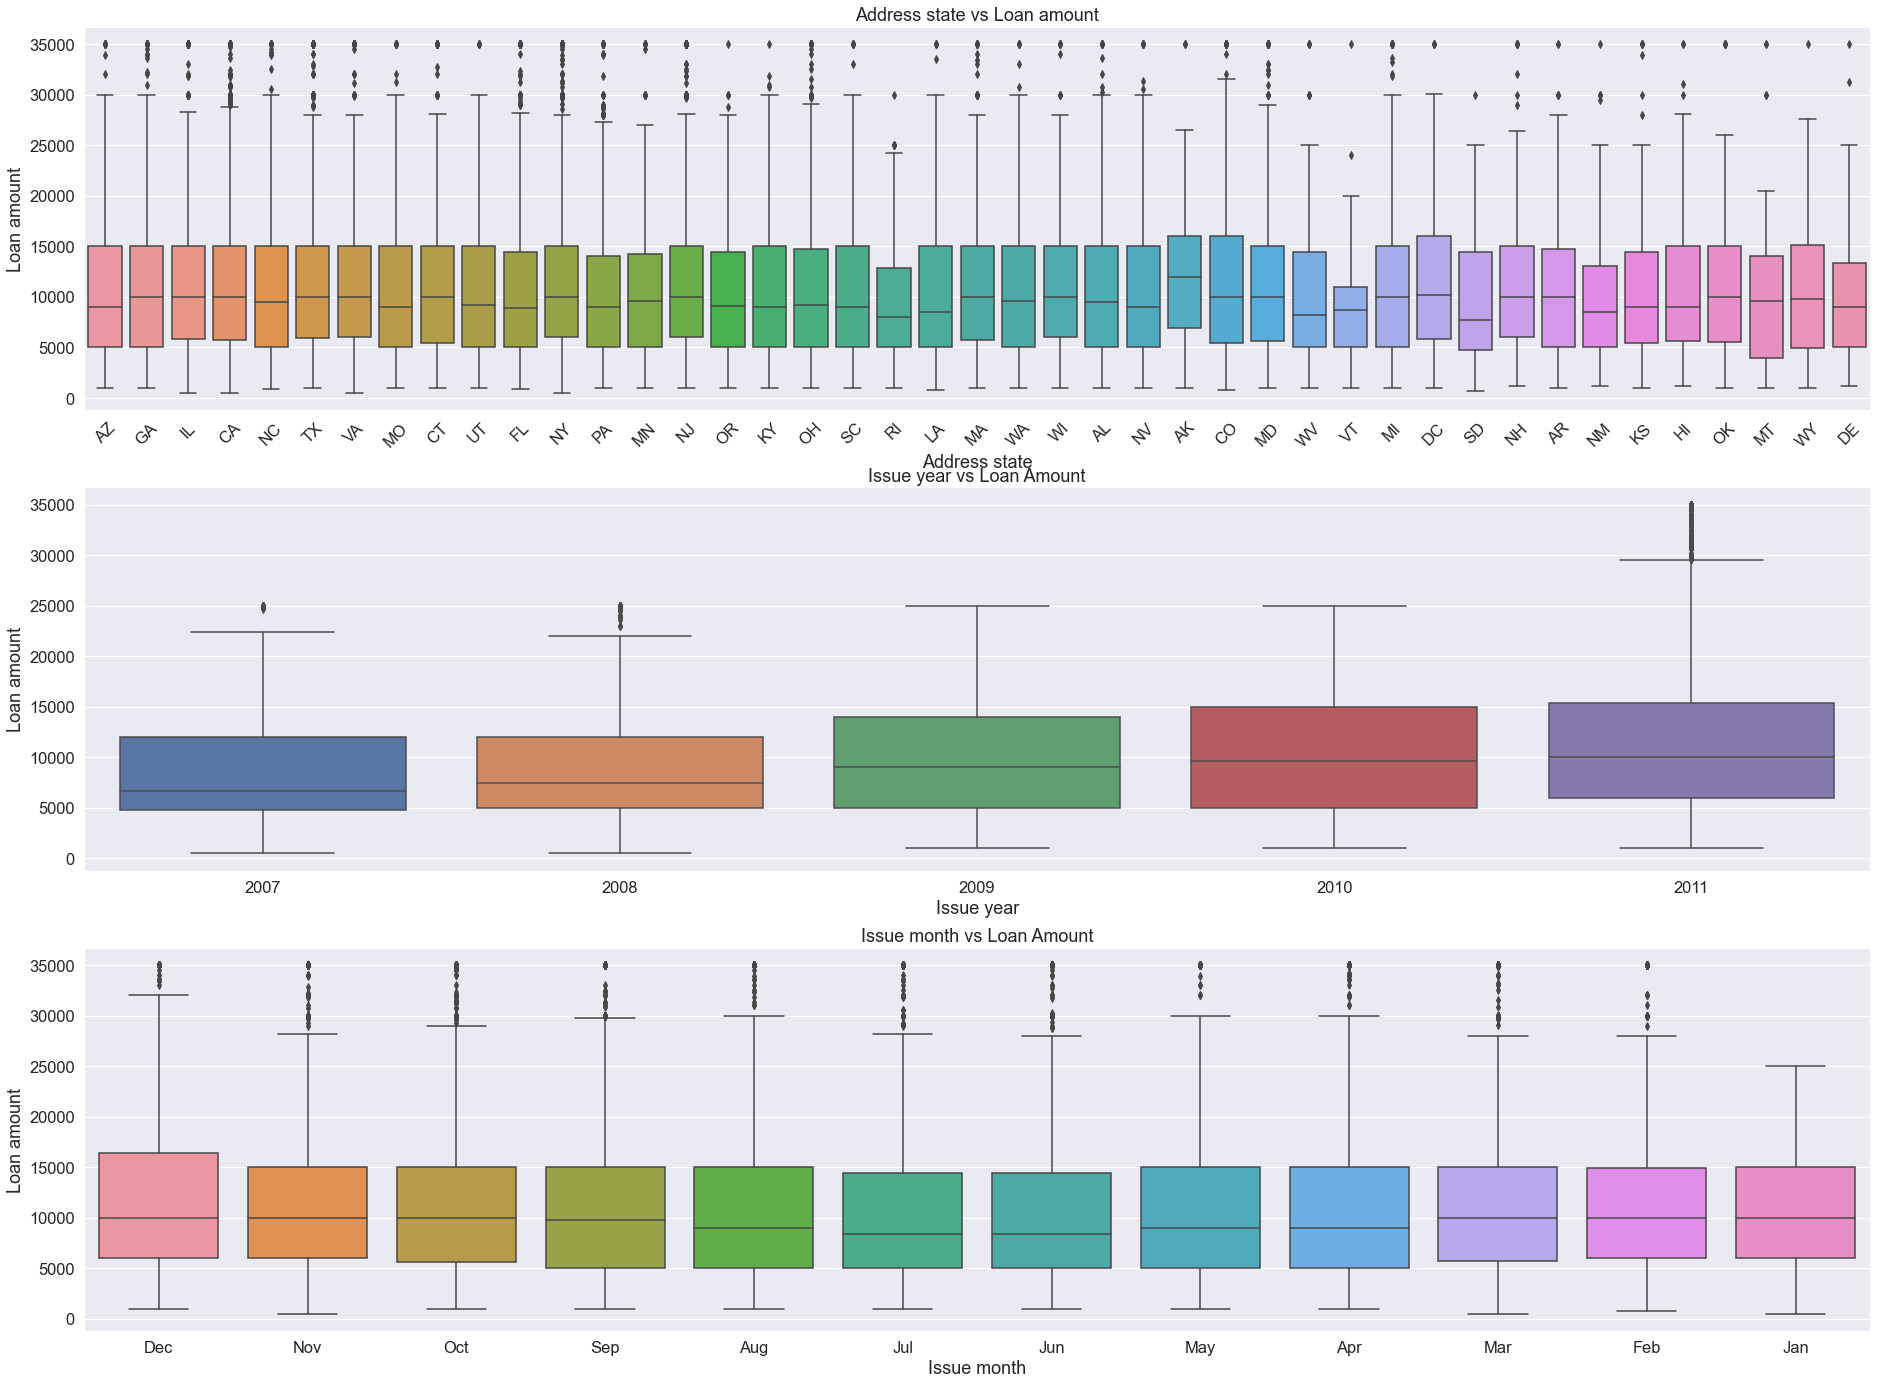

In [108]:
plt.figure(figsize=(32,24))
sns.set(font_scale=1.5) 

plt.subplot(3, 1, 1)
plt.title('Address state vs Loan amount')
fig_1 = sns.boxplot(x=loans_df.addr_state, y=loans_df.loan_amnt, data=loans_df)
fig_1.set(xlabel = 'Address state', ylabel='Loan amount')
plt.xticks(rotation=45)

plt.subplot(3,1,2)
plt.title('Issue year vs Loan Amount')
fig_2 = sns.boxplot(x=loans_df.issue_d_year, y=loans_df.loan_amnt, data=loans_df)
fig_2.set(xlabel = 'Issue year', ylabel='Loan amount')

plt.subplot(3,1,3)
plt.title('Issue month vs Loan Amount')
fig_3 = sns.boxplot(x=loans_df.issue_d_month, y=loans_df.loan_amnt, data=loans_df)
fig_3.set(xlabel = 'Issue month', ylabel='Loan amount')
plt.show()

#### Analysis
1. No significant relation between loan amount vs state other than state IA.
2. Loan Amount gradually increased as year passed away
3. December month lans amounts are little bit higher compared to other months.

### Experience v/s Income

#### Check on why 10+ years of people are highest defautlers (16%).


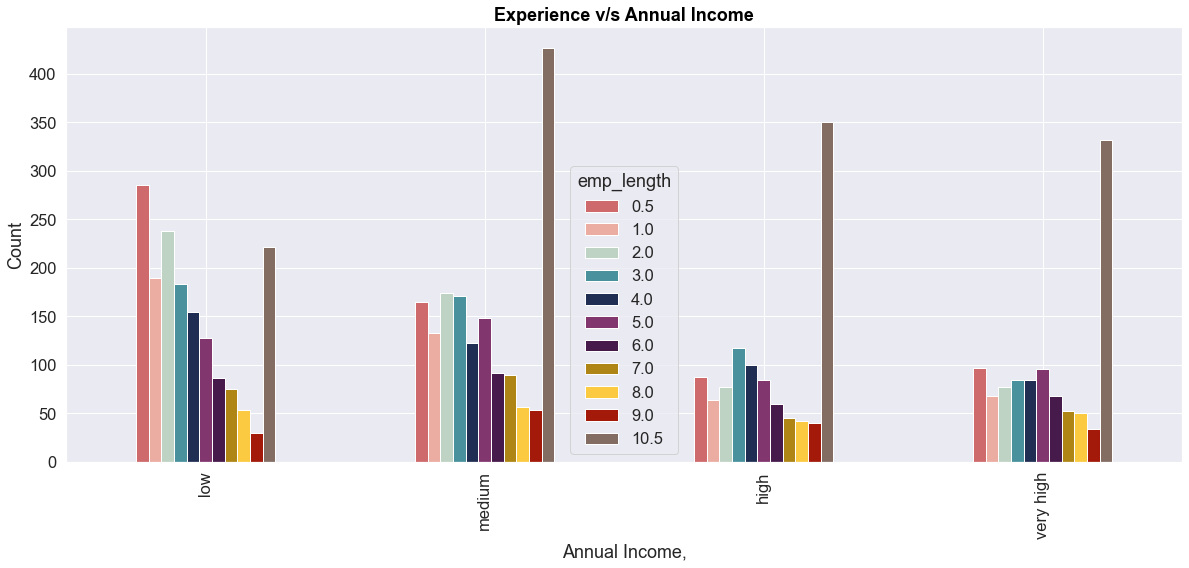

In [109]:
colorlist = ['#ce6a6b', '#ebaca2', '#bed3c3', '#4a919e', '#212e53', '#81366E', '#461A4B', '#AF8515', '#FBCA41', '#A31A0A', '#836D62']
loans_df[loans_df.loan_status == 1].groupby(['ann_inc_bins'])['emp_length'].value_counts().unstack().plot.bar(figsize=(20,8), color=colorlist)
plt.xlabel("Annual Income,")
plt.ylabel("Count")
plt.title("Experience v/s Annual Income",color='black',fontweight='bold')
plt.show()

#### Analysis
1. 10+ years do have higher annual income, so why do they default more ?

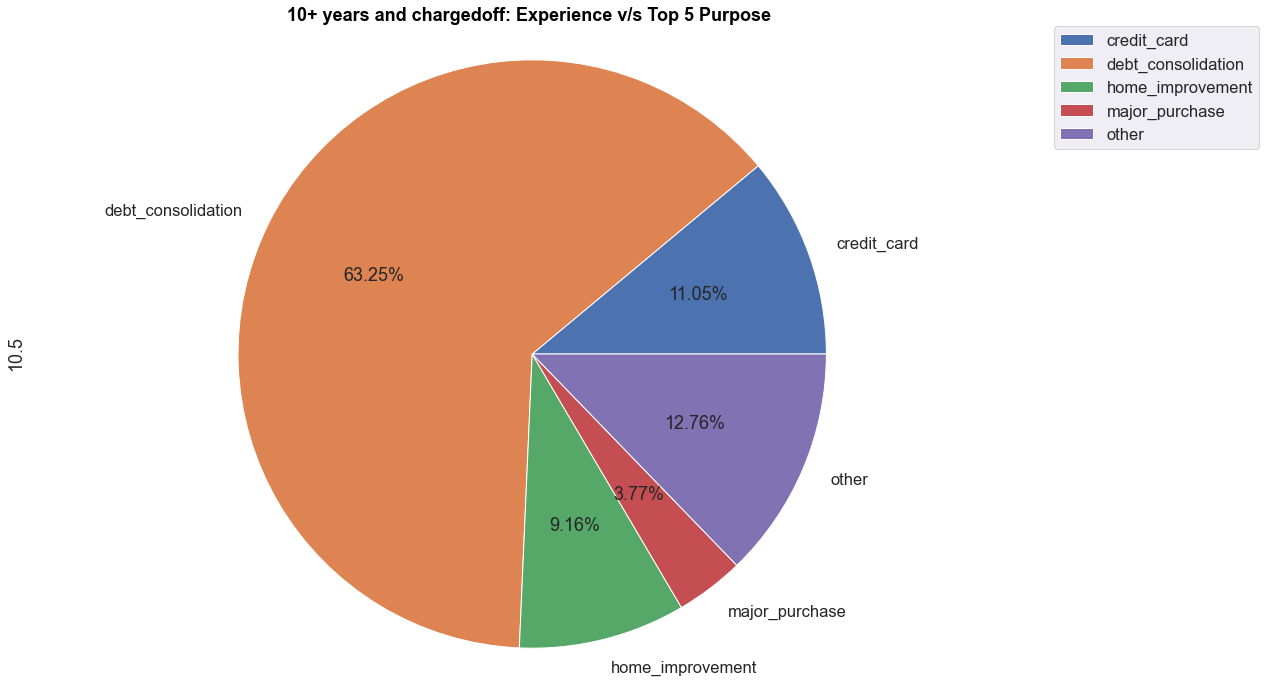

In [110]:
top_5_purpose = loans_df.purpose.value_counts(sorted).reset_index().head(5)['index']
loans_df[(loans_df.loan_status == 1) & 
                 (loans_df.emp_length == 10.5) &
                 (loans_df.purpose.isin(top_5_purpose))].groupby(
                ['purpose'])['emp_length'].value_counts().unstack().plot.pie(figsize=(18,12),
                                                                             subplots=True,
                                                                             autopct='%1.2f%%')
plt.title("10+ years and chargedoff: Experience v/s Top 5 Purpose ",color='black',fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.axis('equal') 
plt.show()

#### Analysis
1. They do take 63.25% of loans for debt consolidation
2. It might be the case that higher the annual income they do incur more debts.

## Analyse Purpose attribute to see the importance of this being a driver 

### Loan Amount v/s Purpose for defaulters


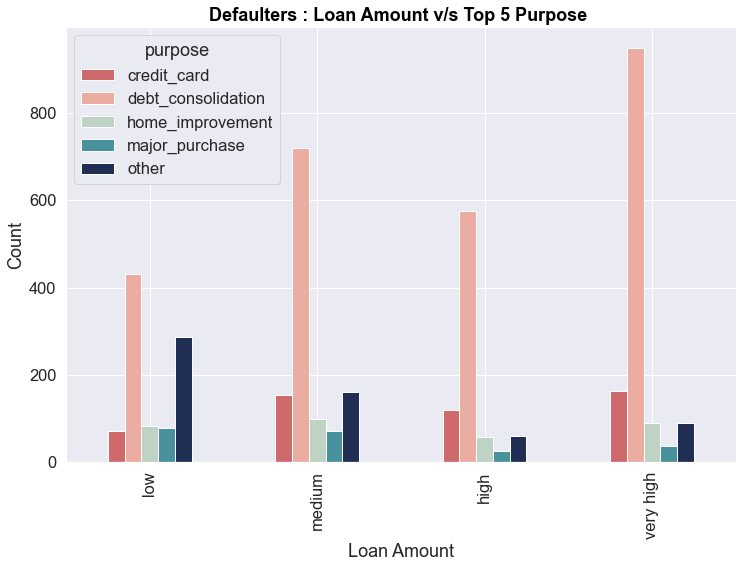

In [111]:
top_5_purpose = loans_df.purpose.value_counts(sorted).reset_index().head(5)['index']
loans_df[(loans_df.loan_status == 1) & 
         (loans_df.purpose.isin(top_5_purpose))].groupby(['loan_amnt_bins'])['purpose'].value_counts().unstack().plot.bar(figsize=(12,8), color=colorlist)
plt.title("Defaulters : Loan Amount v/s Top 5 Purpose ",color='black',fontweight='bold')
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

#### Analysis
1. Debt consolidation stands out to be a main purpose for all the ranges of Loan Amount

### Issued Month v/s Purpose for defaulters


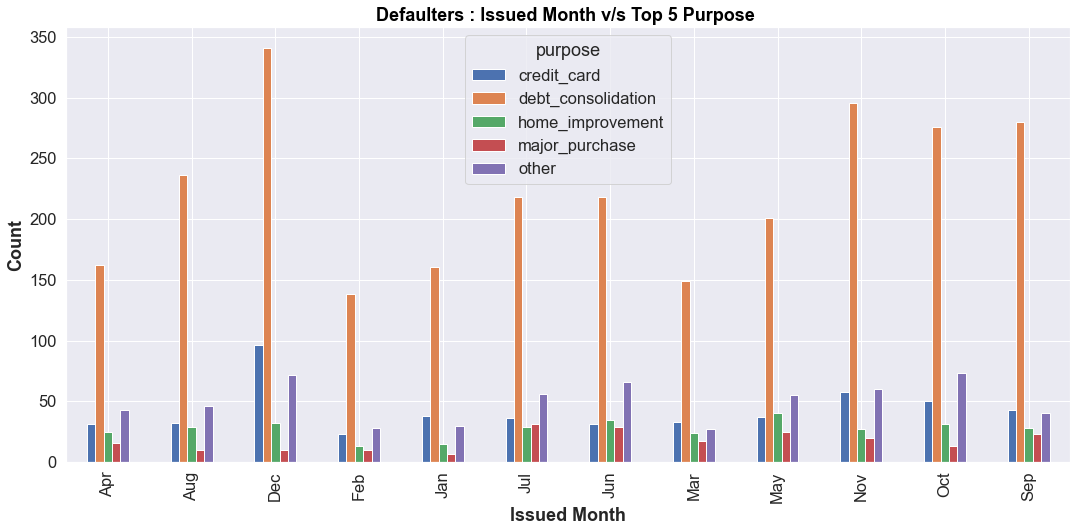

In [112]:
loans_df[(loans_df.loan_status == 1) & 
         (loans_df.purpose.isin(top_5_purpose))].groupby(['issue_d_month'])['purpose'].value_counts().unstack().plot.bar(figsize=(18,8))
plt.title("Defaulters : Issued Month v/s Top 5 Purpose ",color='black',fontweight='bold')
plt.xlabel("Issued Month", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()



#### Analysis
1. Debt consolidation stands out to be a main purpose for all seasons.

### Defaulters v/s Loan Term v/s purpose

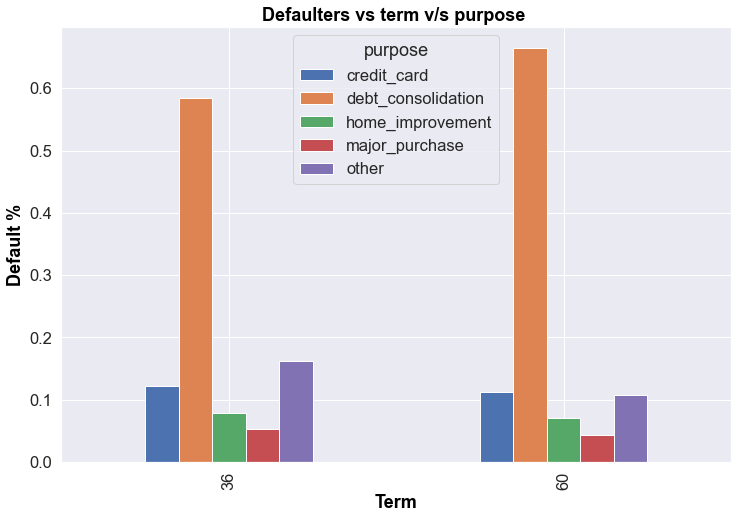

In [113]:
top_5_purpose = loans_df.purpose.value_counts(sorted).reset_index().head(5)['index']
loans_df[(loans_df.loan_status == 1) & 
         (loans_df.purpose.isin(top_5_purpose))].groupby(
                                           ['term'])['purpose'].value_counts(normalize=True).unstack().plot.bar(figsize=(12,8))


plt.xlabel('Term',color='black',fontweight='bold')
plt.ylabel('Default %',color='black',fontweight='bold')
plt.title("Defaulters vs term v/s purpose ",color='black',fontweight='bold')
plt.show()

#### Analysis
1. Debt consolidation stands out to be a main purpose for all terms.
2. Term is not a driver for defaulters as we can see for both 36 and 60 months for top 5 products trends are same. 

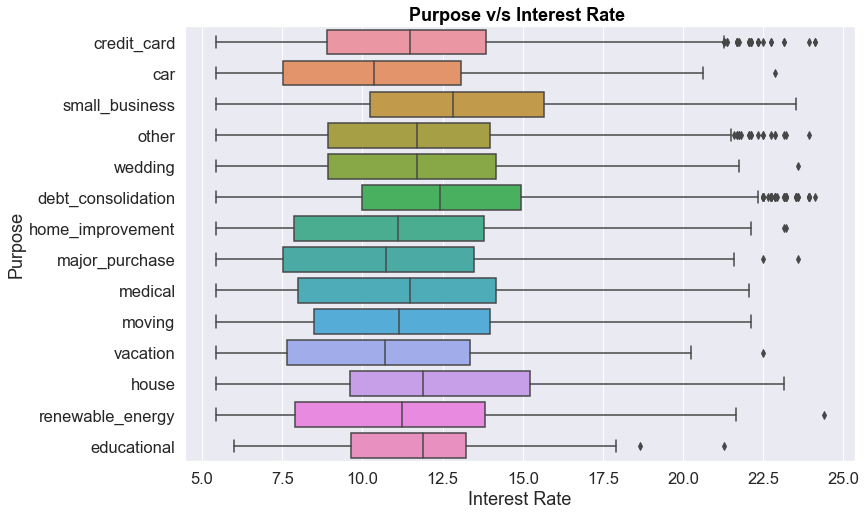

In [114]:
plt.figure(figsize=(12,8))
sns.boxplot(y='purpose', x='int_rate', data =loans_df)
plt.title("Purpose v/s Interest Rate ",color='black',fontweight='bold')
plt.xlabel("Interest Rate")
plt.ylabel("Purpose")
plt.show()

#### Analysis
1. Although Debt consolidation is purpose which has 16% percentage of applicants opting for, but the intrerest rate is higher for small business in comparison to debt consolidation.

### Analyse Month attribute to see the importance of this being a driver 


### Month v/s Loan Amount

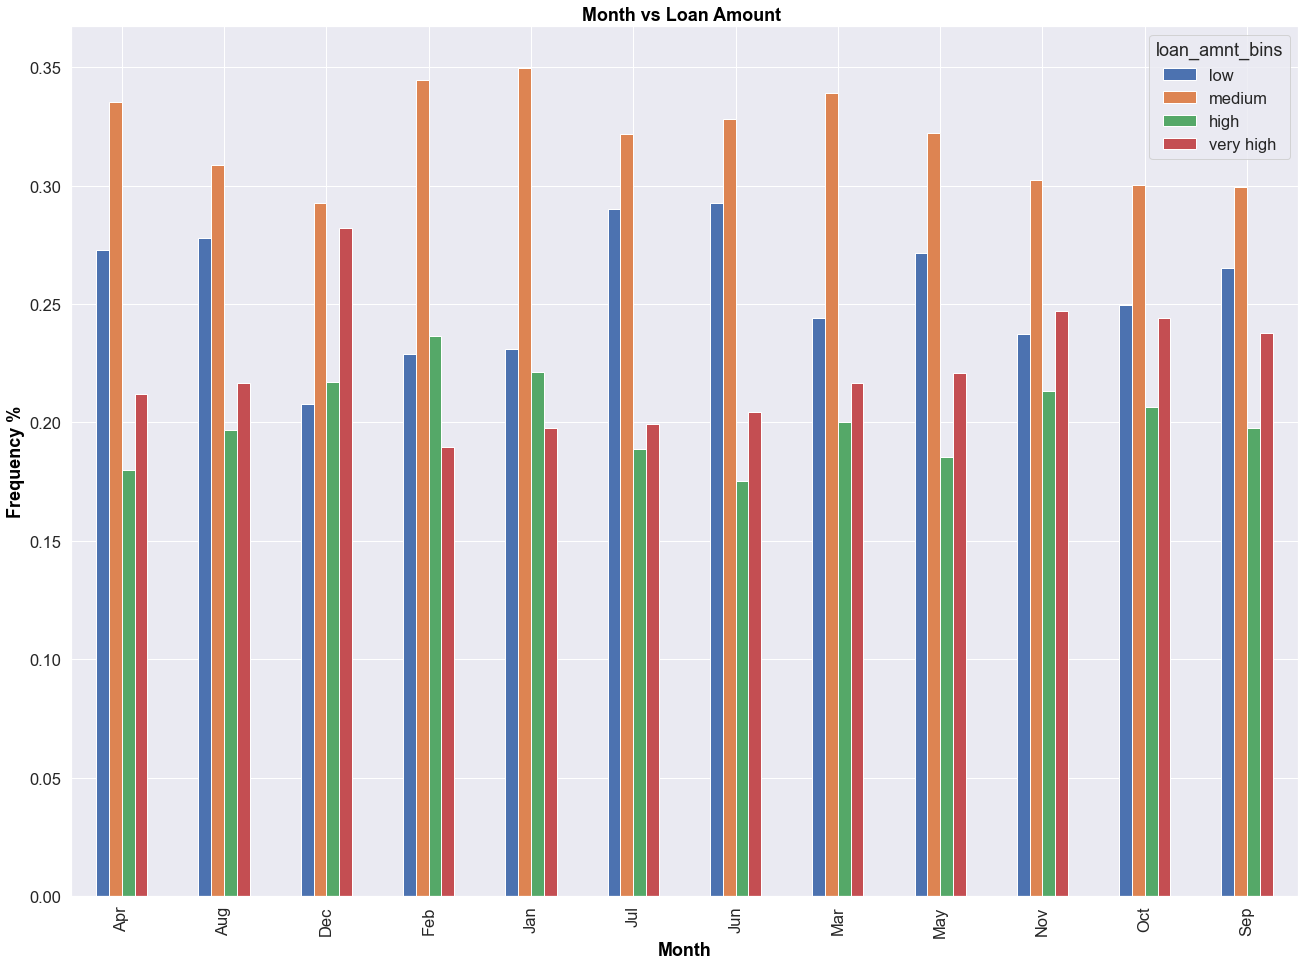

In [115]:
loans_df.groupby(['issue_d_month'])['loan_amnt_bins'].value_counts(normalize=True).unstack().plot.bar(figsize=(22,16))
plt.xlabel('Month',color='black',fontweight='bold')
plt.ylabel('Frequency %',color='black',fontweight='bold')
plt.title("Month vs Loan Amount ",color='black',fontweight='bold')
plt.show()

### Analyse Grade attribute to see the importance of this being a driver 


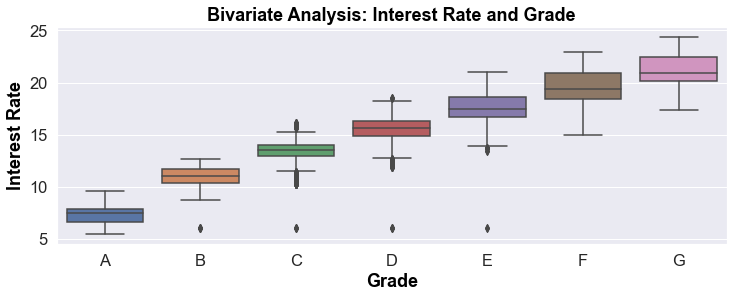

In [116]:
plt.figure(figsize=(12,4))
sns.boxplot(y='int_rate', x='grade', data=loans_df, order=np.sort(loans_df.grade.unique()))
plt.title('Bivariate Analysis: Interest Rate and Grade',color='black',fontweight='bold')
plt.ylabel('Interest Rate',color='black',fontweight='bold')
plt.xlabel('Grade',color='black',fontweight='bold')
plt.show()

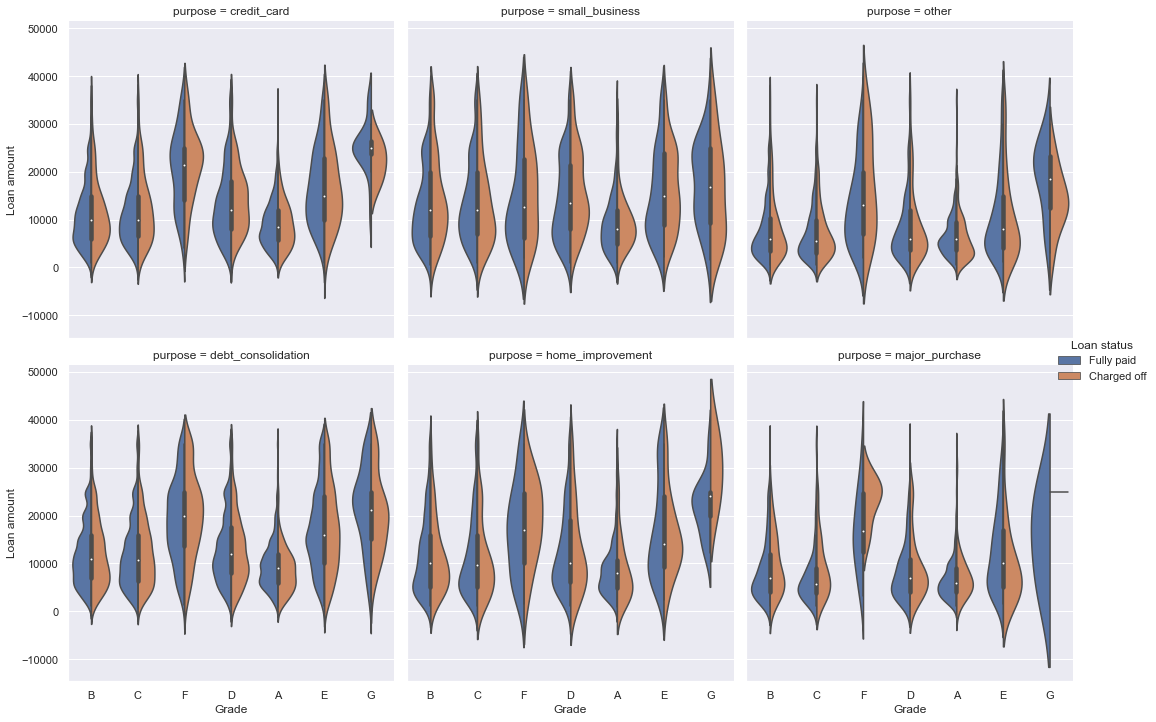

In [117]:
top5_purpose_df = loans_df[loans_df.purpose.isin(loans_df.purpose.value_counts().sort_values(ascending=False).index[0:6])]
sns.set( rc = {'figure.figsize' : ( 12, 8 ), 
               'axes.labelsize' : 12 })

g = sns.catplot(x="grade", y="loan_amnt",
                hue="loan_status", col="purpose",
                data=top5_purpose_df, kind="violin", split=True,
                col_wrap=3, legend_out = True);
g.set_axis_labels('Grade', 'Loan amount')
#g.fig.suptitle("Grade, purpose and Loan amount correlation chart" ,
#               fontweight = 'bold')
g._legend.set_title('Loan status')
new_labels = ['Fully paid', 'Charged off']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

In [118]:
#In total available populication, Grade purpose group to understand which grades and which purposes are defaulters 
grade_purpose_filter = loans_df.groupby(['grade', 'purpose', 'loan_amnt_bins'])['loan_status'].value_counts(normalize=True).unstack().reset_index()

grade_purpose_filter['1_percent'] = (grade_purpose_filter[1] / (grade_purpose_filter[1] + grade_purpose_filter[0]))
grade_purpose_filter['0_percent'] = (grade_purpose_filter[0] / (grade_purpose_filter[1] + grade_purpose_filter[0]))
#print (top6state_top6purpose_filter[['addr_state', 'purpose','loan_amnt_bins', '0_percent']].sort_values(('0_percent'), ascending=False))
#print ("------------------------------------------")
print (grade_purpose_filter[['grade', 'purpose', 'loan_amnt_bins','1_percent']].sort_values(('1_percent'), ascending=False)[0:6])

loan_status grade         purpose loan_amnt_bins  1_percent
347             G           other           high       0.80
351             G  small_business            low       0.67
268             E        vacation         medium       0.67
270             E        vacation      very high       0.67
302             F         medical         medium       0.67
253             E          moving         medium       0.57


In [119]:
#Verifying the grade spectrum for top 6 state and top 6 purpose variables.
top6_state_df = loans_df[loans_df.addr_state.isin(loans_df.addr_state.value_counts().sort_values(ascending=False).index[0:6])]
top6_state_top6_purpose_df = top6_state_df[top6_state_df.purpose.isin(top6_state_df.purpose.value_counts().sort_values(ascending=False).index[0:6])]

grade_purpose_filter = top6_state_top6_purpose_df.groupby(['grade', 'purpose', 'loan_amnt_bins'])['loan_status'].value_counts(normalize=True).unstack().reset_index()

grade_purpose_filter['1_percent'] = (grade_purpose_filter[1] / (grade_purpose_filter[1] + grade_purpose_filter[0]))
grade_purpose_filter['0_percent'] = (grade_purpose_filter[0] / (grade_purpose_filter[1] + grade_purpose_filter[0]))
#print (top6state_top6purpose_filter[['addr_state', 'purpose','loan_amnt_bins', '0_percent']].sort_values(('0_percent'), ascending=False))
#print ("------------------------------------------")
print (grade_purpose_filter[['grade', 'purpose', 'loan_amnt_bins','1_percent']].sort_values(('1_percent'), ascending=False)[0:6])

loan_status grade             purpose loan_amnt_bins  1_percent
152             G               other      very high       0.67
156             G      small_business      very high       0.58
145             G  debt_consolidation           high       0.58
121             F         credit_card         medium       0.50
154             G      small_business         medium       0.50
131             F    home_improvement      very high       0.50


#### Observations
- The borrowers from lower grades like <b>G, F and E</b> are high probable defaulters as can be seen in below tables.
- <b>Total population observation for grade and purpose</b>
|grade         |purpose |Loan amount categories  |Charged off loan %
|-|-|-|-|
G           |other           |high       |0.80
G  |small_business            |low       |0.67
E        |vacation         |medium       |0.67
E        |vacation      |very high       |0.67
F         |medical         |medium       |0.67
E          |moving         |medium       |0.57

- <b>Sampled data for top 6 states and top 6 purposes</b>
|grade |purpose |Loan amount categories  |Charged off loan %
|-|-|-|-|
G               |other      |very high       |0.67
G      |small_business      |very high       |0.58
G  |debt_consolidation           |high       |0.58
F         |credit_card         |medium       |0.50
G      |small_business         |medium       |0.50
F    |home_improvement      |very high       |0.50

### Analyse Home Ownership attribute to see the importance of this being a driver 

#### Analyse the reason behind why home owners have higher percentage of being defaulter


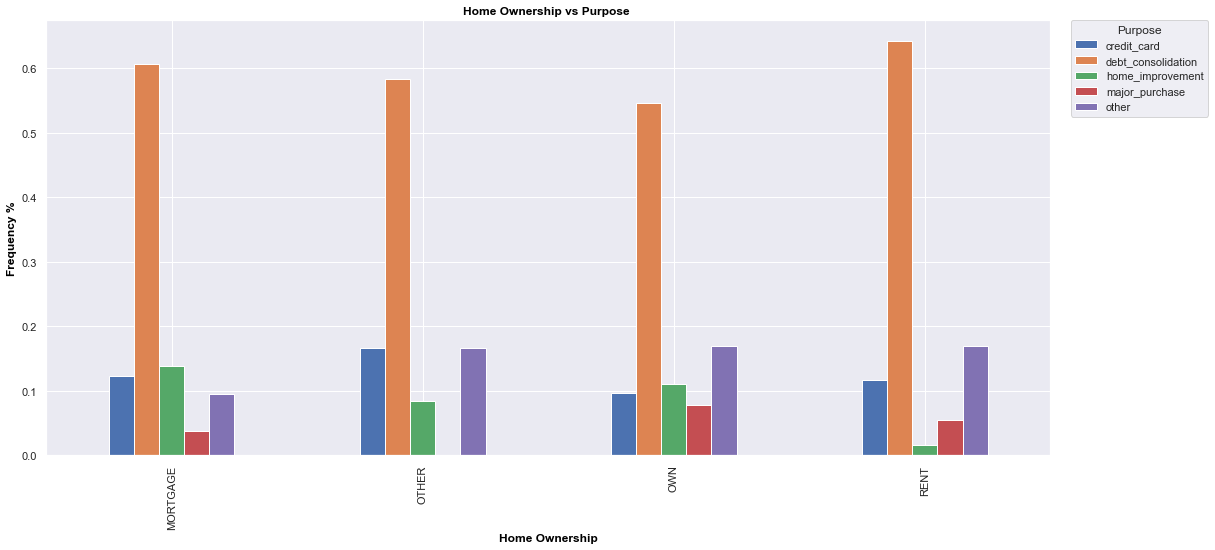

In [120]:
top_5_purpose = loans_df.purpose.value_counts(sorted).reset_index().head(5)['index']
loans_df[(loans_df.loan_status == 1) & 
         (loans_df.purpose.isin(top_5_purpose))].groupby(
                                           ['home_ownership'])['purpose'].value_counts(normalize=True).unstack().plot.bar(figsize=(18,8))
plt.xlabel('Home Ownership',color='black',fontweight='bold')
plt.ylabel('Frequency %',color='black',fontweight='bold')
plt.title("Home Ownership vs Purpose ",color='black',fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Purpose')
plt.show()

#### Analysis
Those who own the house they tend to take more loans for home improvement and major purchases

### Analyse State attribute to see the importance of this being a driver 


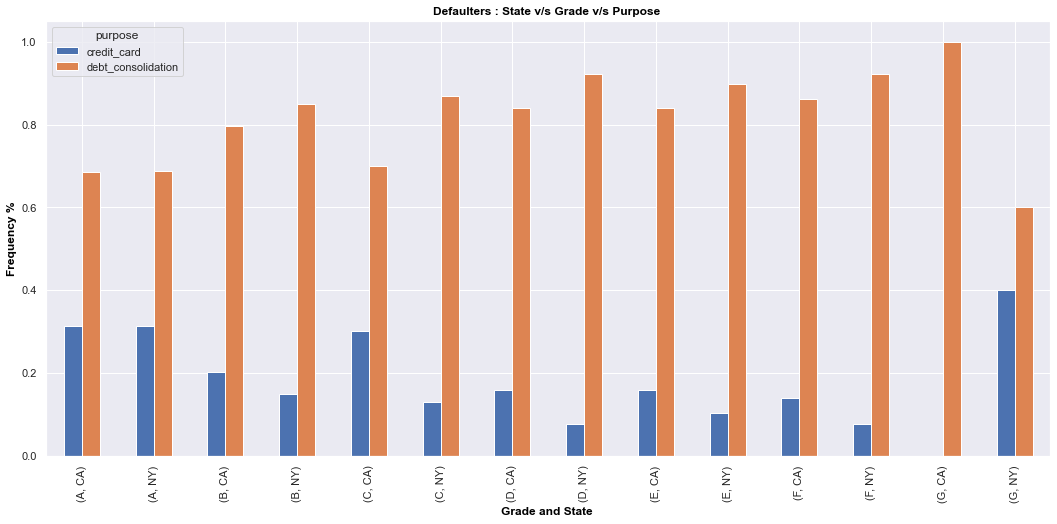

In [121]:
# View defaulters for top 2 states against top 2 purpose for all grades

top_2_purpose = loans_df.purpose.value_counts(sorted).reset_index().head(2)['index']
top_2_states = loans_df.addr_state.value_counts(sorted).reset_index().head(2)['index']
loans_df[(loans_df.loan_status == 1) & 
         (loans_df.purpose.isin(top_2_purpose)) & 
         (loans_df.addr_state.isin(top_2_states))].groupby(
                                           ['grade','addr_state'])['purpose'].value_counts(normalize=True).unstack().plot.bar(figsize=(18,8))
plt.xlabel('Grade and State ',color='black',fontweight='bold')
plt.ylabel('Frequency %',color='black',fontweight='bold')
plt.title("Defaulters : State v/s Grade v/s Purpose ",color='black',fontweight='bold')
plt.show()


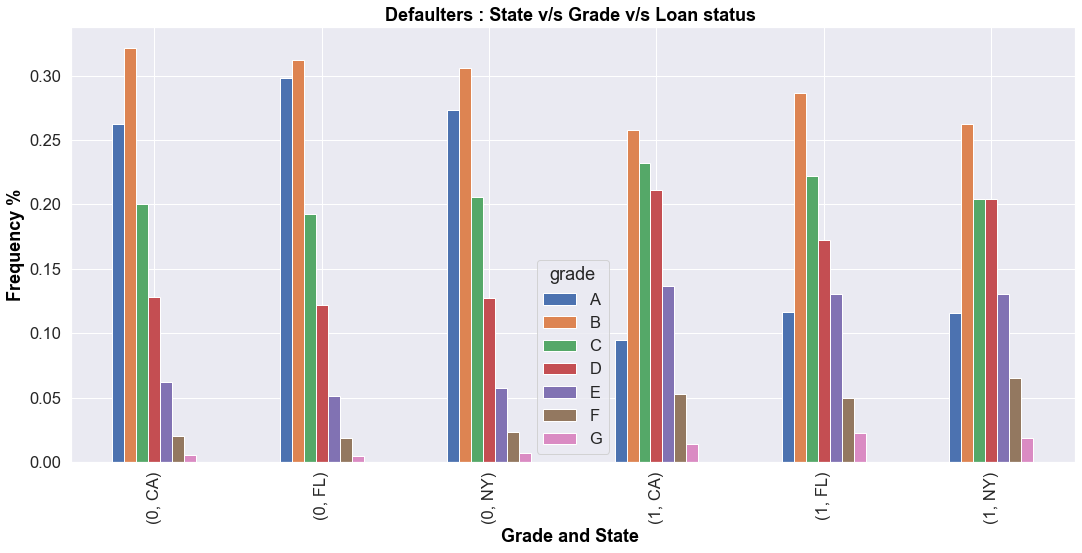

In [122]:
sns.set(font_scale=1.5)
top_2_states = loans_df.addr_state.value_counts(sorted).reset_index().head(3)['index']
loans_df[(loans_df.addr_state.isin(top_2_states))].groupby(
                                           ['loan_status','addr_state'])['grade'].value_counts(normalize=True).unstack().plot.bar(figsize=(18,8))
plt.xlabel('Grade and State ',color='black',fontweight='bold')
plt.ylabel('Frequency %',color='black',fontweight='bold')
plt.title("Defaulters : State v/s Grade v/s Loan status ",color='black',fontweight='bold')
#plt.legend(labels = ['Fully paid', 'Charged off'])
plt.show()

In [123]:
#Filtering the actual data to get sizeable plots to derive meaningful observations
top3_state_df = loans_df[(loans_df.addr_state.isin(loans_df.addr_state.value_counts().sort_values(ascending=False).index[0:3])) & (loans_df.loan_status==1)]
top3_state_df.shape

(2032, 22)

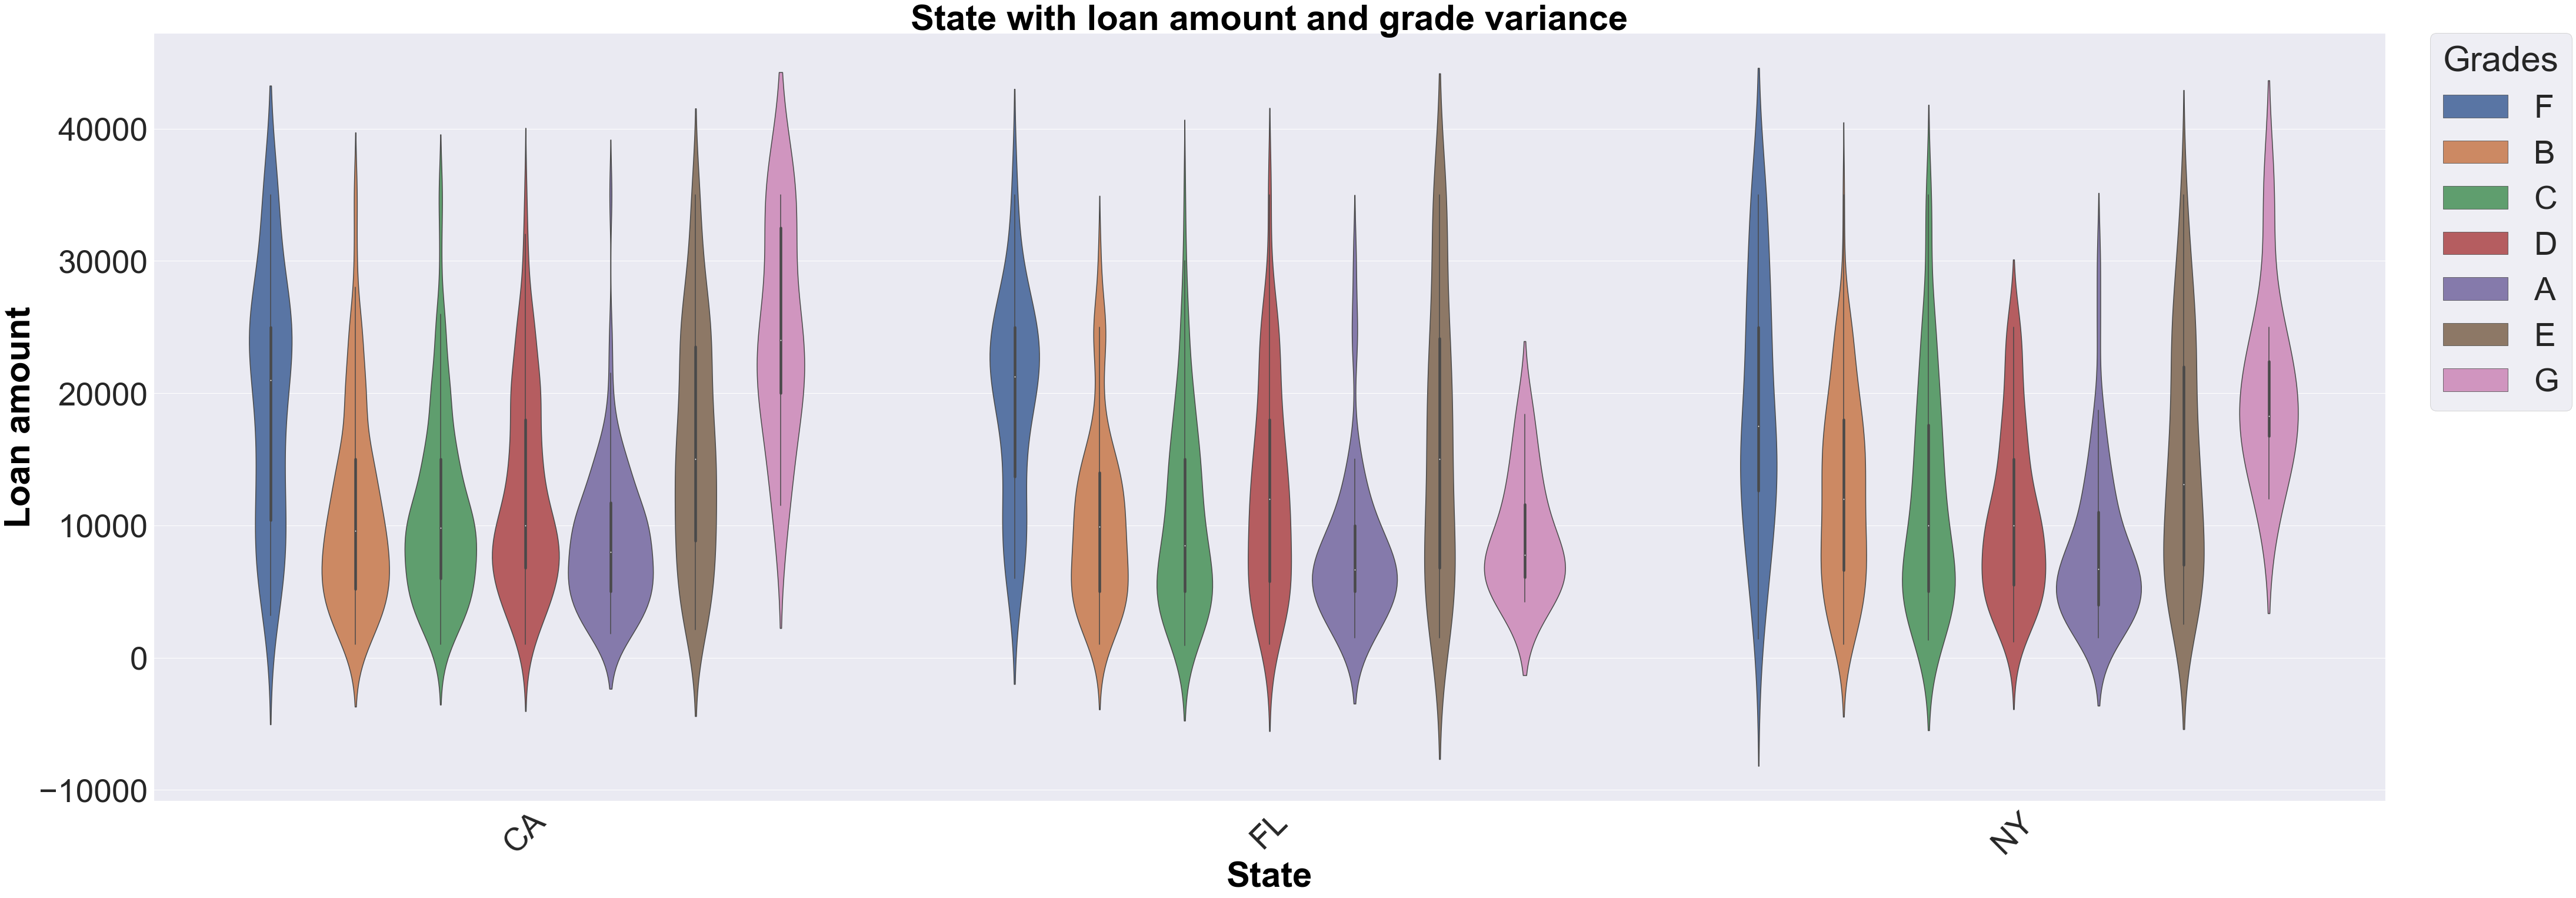

In [124]:
#Filtering the actual data to get sizeable plots to derive meaningful observations
sns.set(font_scale=5) 
plt.figure(figsize=(68,24))
sns.violinplot(y = "loan_amnt", x = "addr_state", hue = "grade", kind = 'violin', 
              data = top3_state_df, order=list(top3_state_df.addr_state.value_counts().sort_values(ascending=False).index),
            );
plt.xticks(rotation=45)
#plt.legend(labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Grades')
plt.xlabel('State', color='black',fontweight='bold')
plt.ylabel( 'Loan amount', color='black',fontweight='bold')
plt.title ('State with loan amount and grade variance', color='black',fontweight='bold')
plt.show()

#### Observations
- The Grade G applicant statying in CA and NY are taking higher loans.

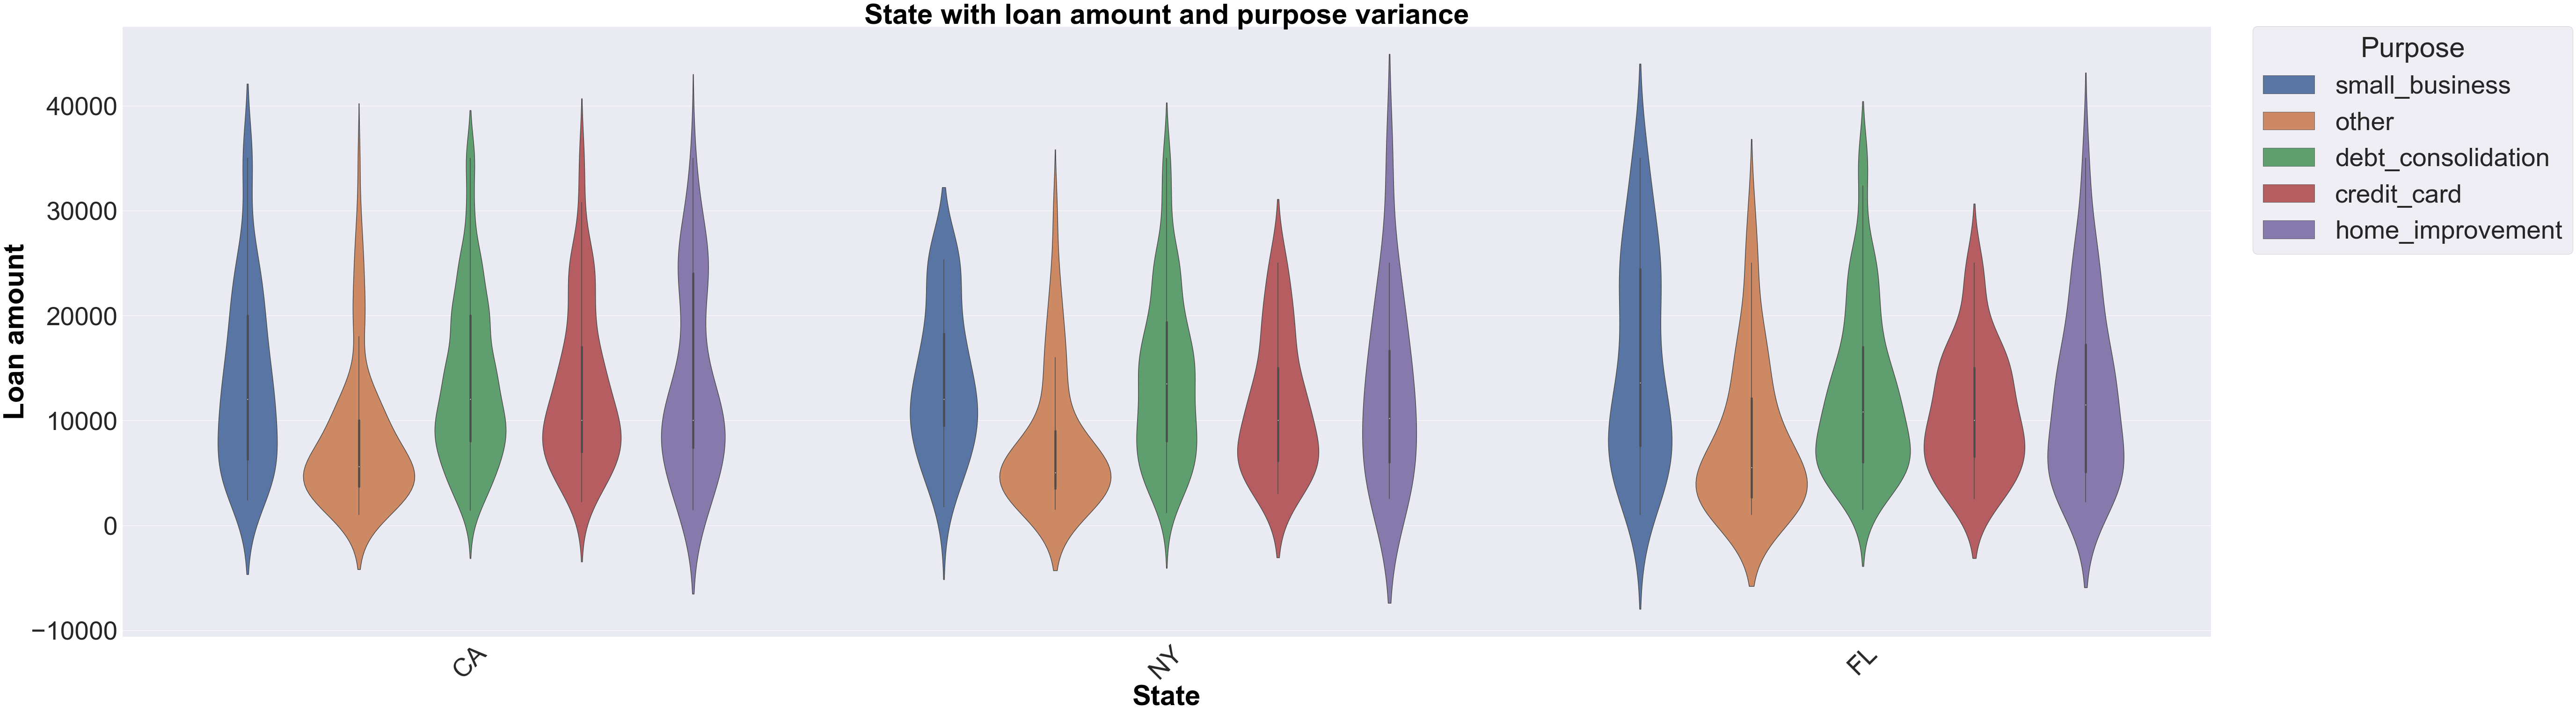

In [125]:
#Filtering the actual data to get sizeable plots to derive meaningful observations
top3_state_df = top3_state_df[top3_state_df.purpose.isin(top3_state_df.purpose.value_counts().sort_values(ascending=False).index[0:5])]
sns.set(font_scale=5) 
plt.figure(figsize=(80,24))
sns.violinplot(y = "loan_amnt", x = "addr_state", hue = "purpose", kind = 'violin', 
              data = top3_state_df, order=list(top3_state_df.addr_state.value_counts().sort_values(ascending=False).index),
            );
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Purpose')
plt.xlabel('State', color='black',fontweight='bold')
plt.ylabel( 'Loan amount', color='black',fontweight='bold')
plt.title ('State with loan amount and purpose variance', color='black',fontweight='bold')
#plt.yscale('log')
plt.show()

In [126]:
top6state_top6purpose_filter = top3_state_top3_purpose_df.groupby(['addr_state', 'purpose', 'loan_amnt_bins'])['loan_status'].value_counts(normalize=True).unstack().reset_index()
top6state_top6purpose_filter.head(2)

NameError: name 'top3_state_top3_purpose_df' is not defined

In [ ]:
top6state_top6purpose_filter['1_percent'] = (top6state_top6purpose_filter[1] / (top6state_top6purpose_filter[1] + top6state_top6purpose_filter[0]))
top6state_top6purpose_filter['0_percent'] = (top6state_top6purpose_filter[0] / (top6state_top6purpose_filter[1] + top6state_top6purpose_filter[0]))
#print (top6state_top6purpose_filter[['addr_state', 'purpose','loan_amnt_bins', '0_percent']].sort_values(('0_percent'), ascending=False))
#print ("------------------------------------------")
print (top6state_top6purpose_filter[['addr_state', 'purpose', 'loan_amnt_bins','1_percent']].sort_values(('1_percent'), ascending=False)[0:6])

In [ ]:
#sns.set(font_scale=5) 
#top3_state_df = loans_df[loans_df.addr_state.isin(loans_df.addr_state.value_counts().sort_values(ascending=False).index[0:3])]
#top3_state_top3_purpose_df = top3_state_df[top3_state_df.purpose.isin(top3_state_df.purpose.value_counts().sort_values(ascending=False).index[0:3])]
#top3_state_top3_purpose_df.groupby(['addr_state', 'purpose', 'loan_amnt_bins'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(80, 24))

In [ ]:
sns.set( rc = {'figure.figsize' : ( 12, 8 ), 
               'axes.labelsize' : 12 })

g = sns.catplot(x="addr_state", y="loan_amnt",
                hue="loan_status", col="purpose",
                data=top6_state_top6_purpose_df, kind="violin", split=True,
                col_wrap=3, legend_out = True);
g.set_axis_labels('States', 'Loan amount')
#g.fig.suptitle("Grade, purpose and Loan amount correlation chart" ,
#               fontweight = 'bold')
g._legend.set_title('Loan status')
new_labels = ['Fully paid', 'Charged off']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

#### Observations
- The borrower's from top 3 total loan applicants' states are opting higher loan amounts for other and debt consolidation purposes. The defaulting potential for these applicants classifed from state and purpose ranges from ~40% to ~20%

|State|purpose |Loan amount categories  |Charged off loan %
|-|-|-|-|
|FL               |other      |very high       |0.39
|CA               |other      |very high       |0.23
|NY               |other      |very high       |0.22
|FL  |debt_consolidation      |very high       |0.21
|CA  |debt_consolidation      |very high       |0.20
|NY  |debt_consolidation      |very high       |0.19

# Conclusions
- Grade of individual borrower is a strong indicator for loan default as it also affects the interest rate. Lower the grade, higher the interest rate cascades further deep.
- The loan purpose for small businesses and debt consolidation to be strongly scrutinized as most of the past defaulters belong to these categories.
- Borrowers with the mortgage home ownership tend to take higher loans and more prone to be defaulters.
- Borrower with higher experience tend to lend higher money and be defaulters. Hence the employee length with above four driving factors to be scrutinized strongly.
- December, May and September issued months’ loans are defaulted the most by borrowers. 
- Borrowers from states like CA, FL, NY defaulted most, hence the loan applicant address to be examined.
